In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

data = pd.read_csv('./data/mental_health_and_technology_usage_2024.csv')

# Первичный анализ дата сета


### Посмотрим на первые 5 строк дата сета

In [42]:
data.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


### Посмотрим на размер дата сета  и типы данных

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

### Посмотрим на статистику дата сета

In [44]:
data.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


### Посмотрим на количество пропущенных значений

In [45]:
data.isnull().sum()

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64

### Посмотрим на количество дубликатов

In [46]:
print(data.duplicated().sum())

0


### Посмотрим на количество уникальных значений

In [47]:
data.nunique()

User_ID                     10000
Age                            48
Gender                          3
Technology_Usage_Hours       1101
Social_Media_Usage_Hours      801
Gaming_Hours                  501
Screen_Time_Hours            1400
Mental_Health_Status            4
Stress_Level                    3
Sleep_Hours                   501
Physical_Activity_Hours      1001
Support_Systems_Access          2
Work_Environment_Impact         3
Online_Support_Usage            2
dtype: int64

In [48]:
data['Age'].unique()

array([23, 21, 51, 25, 53, 58, 63, 57, 31, 64, 40, 24, 38, 26, 55, 37, 34,
       39, 42, 27, 50, 60, 20, 29, 30, 47, 41, 44, 48, 45, 59, 62, 28, 32,
       49, 33, 18, 36, 19, 22, 35, 46, 56, 54, 61, 52, 65, 43])

### Посмотрим на распределение значений в колонке Age

In [49]:
data['Age'].value_counts()

Age
62    245
59    235
32    231
65    230
45    226
38    224
50    224
25    222
26    220
18    220
46    218
53    218
57    218
23    216
21    216
22    216
49    215
42    214
20    214
52    214
29    213
24    212
27    210
37    208
64    208
41    208
34    207
36    207
63    207
33    206
40    205
56    203
43    203
44    202
55    198
39    197
35    197
30    196
58    196
54    194
51    191
28    190
61    187
31    186
60    186
48    186
47    183
19    178
Name: count, dtype: int64

In [50]:
data['Age'].describe()

count    10000.000000
mean        41.518600
std         13.920217
min         18.000000
25%         29.000000
50%         42.000000
75%         54.000000
max         65.000000
Name: Age, dtype: float64

# Анализ данных

### Функция для визуализации распределения признака


In [51]:
def plot_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    if data[feature].dtype in ['int64', 'float64']:
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    else:
        sns.countplot(y=feature, data=data)
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()

### Визуализация распределения признаков


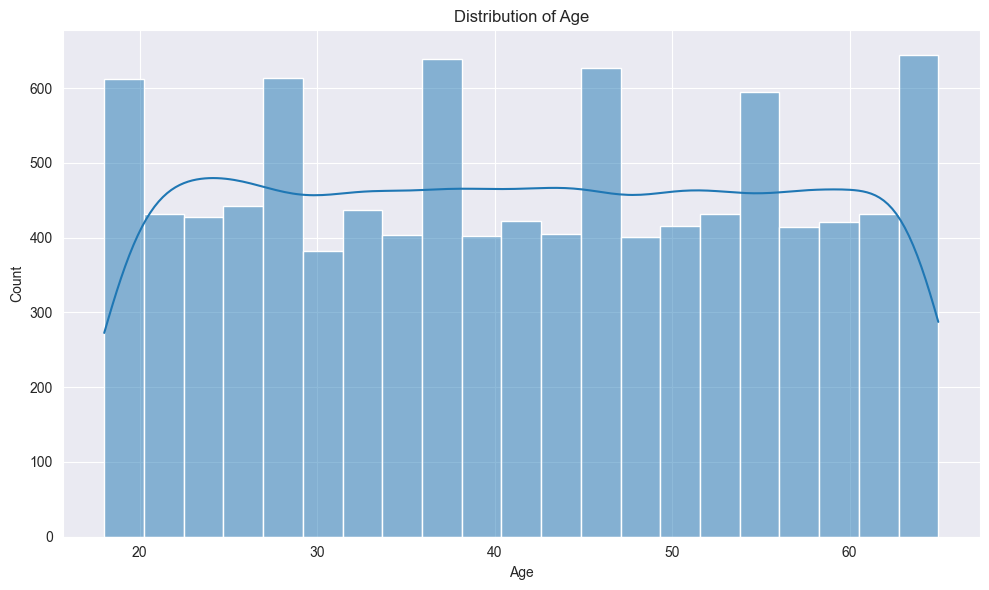

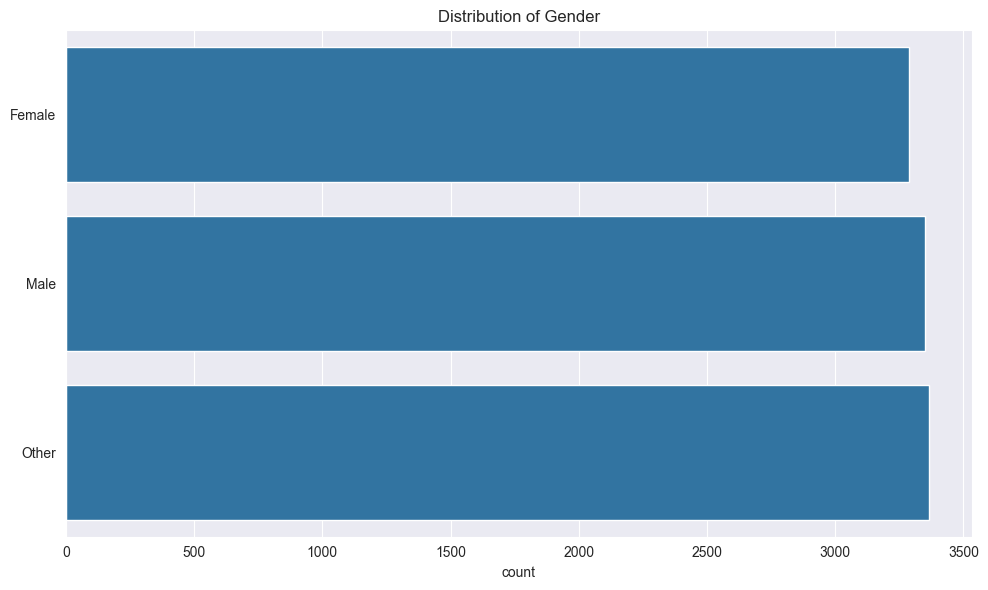

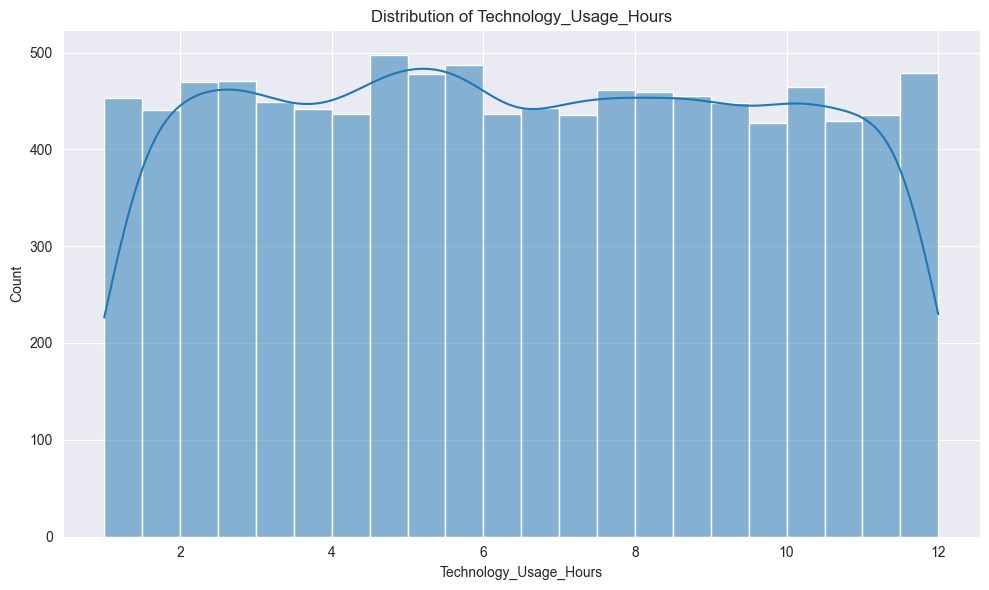

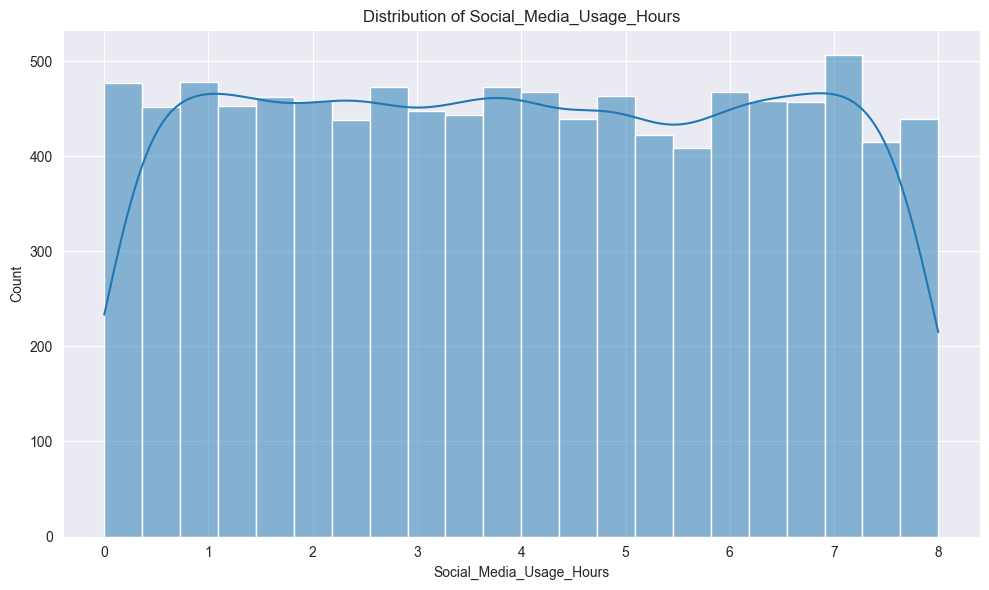

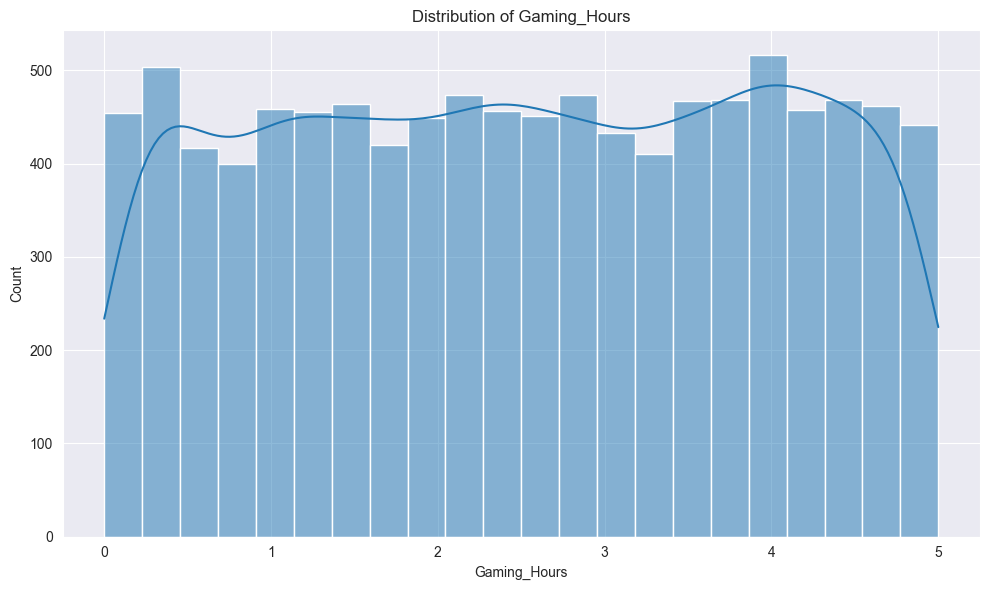

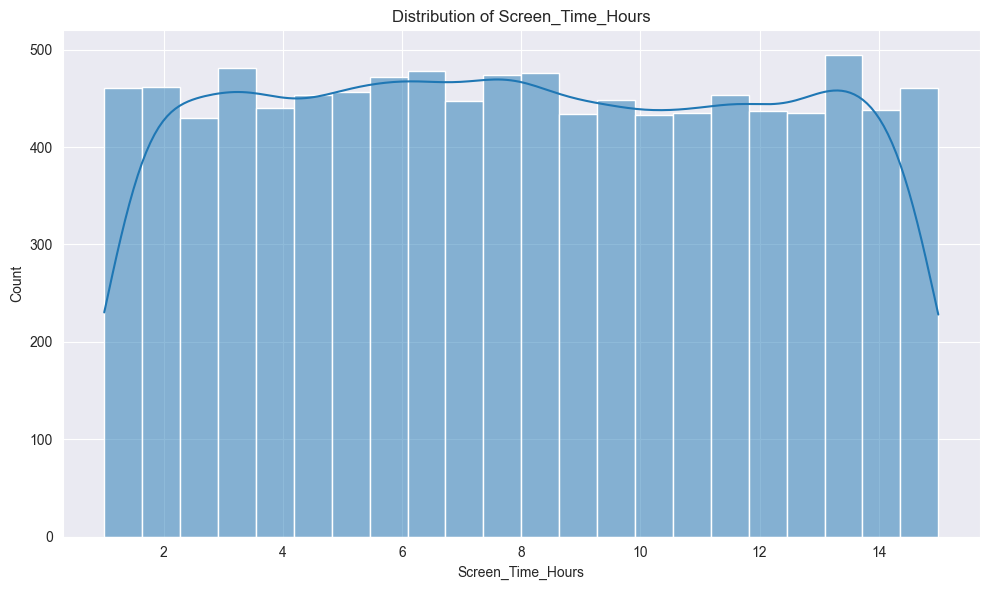

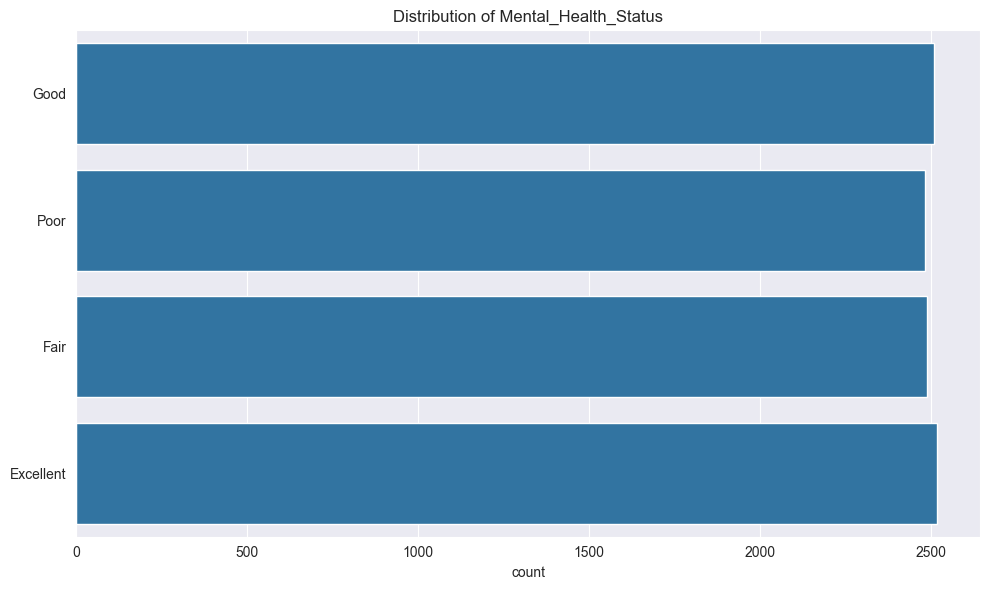

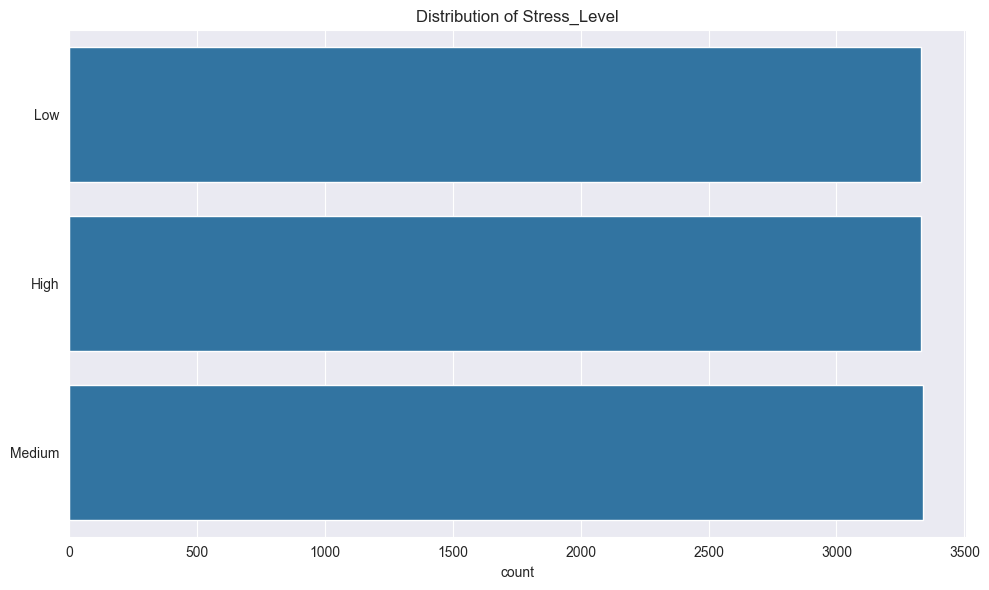

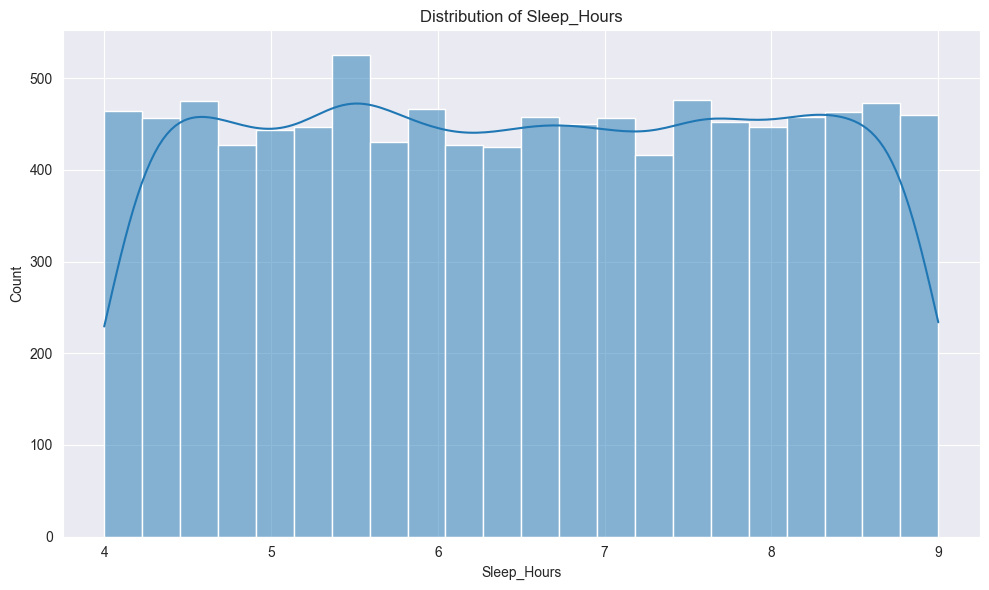

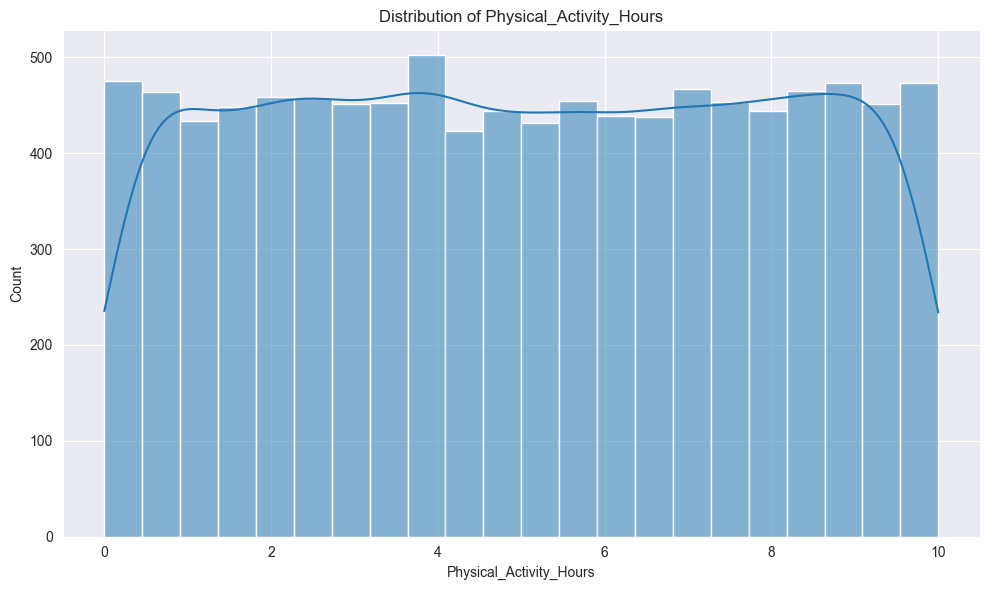

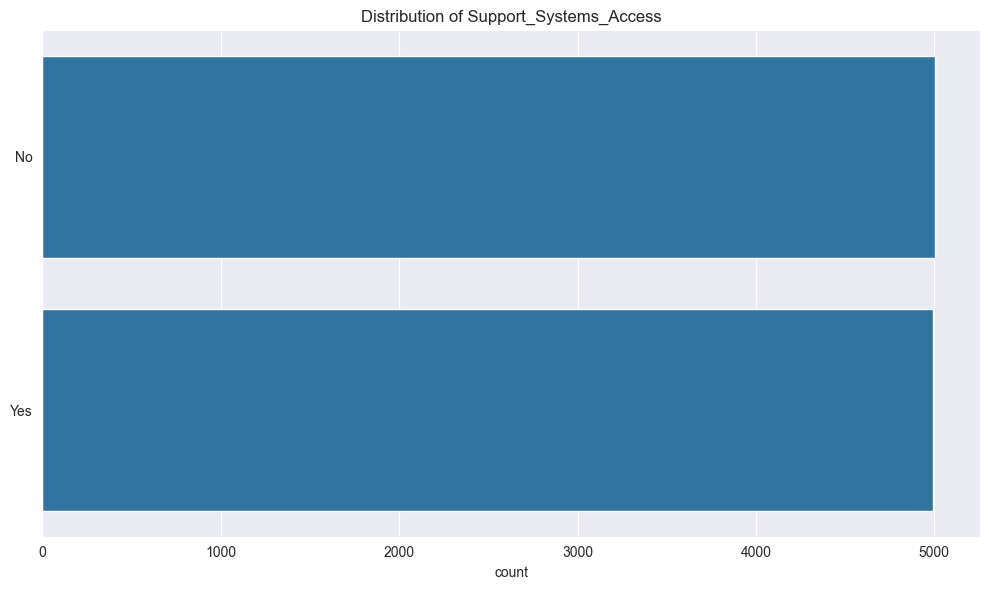

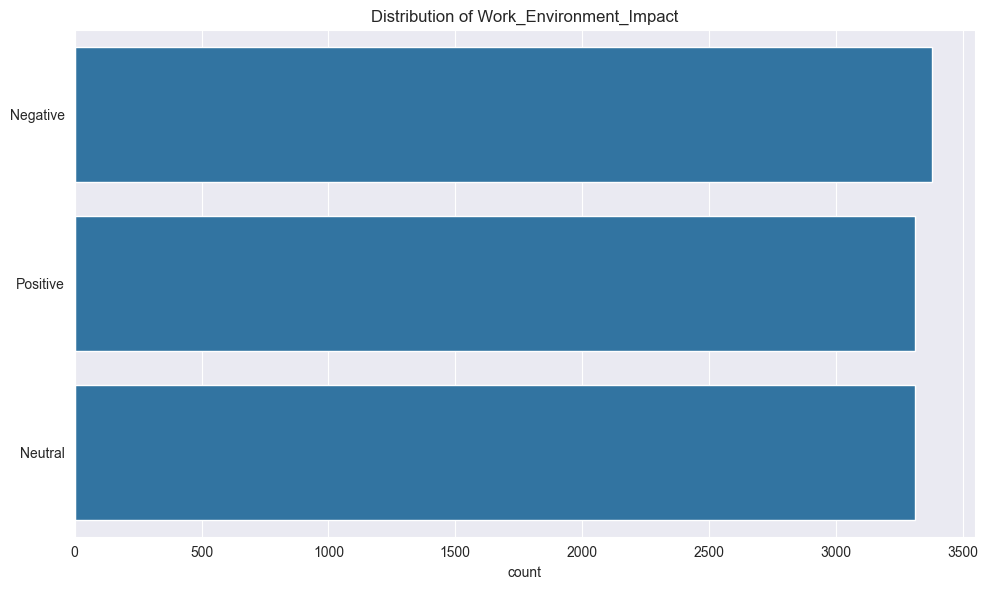

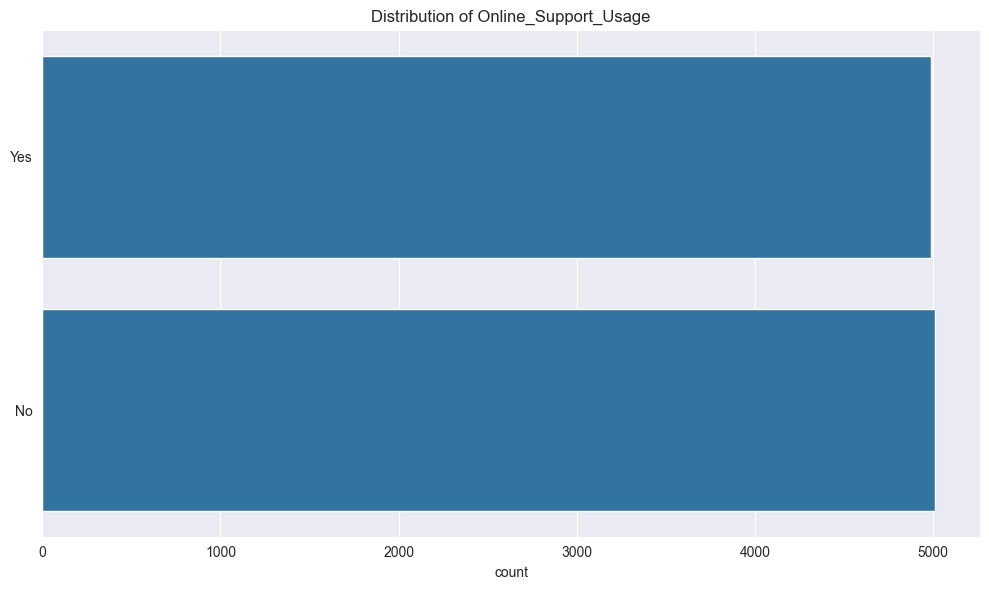

In [52]:
features_to_visualize = [col for col in data.columns if col != 'User_ID']
for feature in features_to_visualize:
    plot_distribution(data, feature)


### Корреляционный анализ для числовых признаков


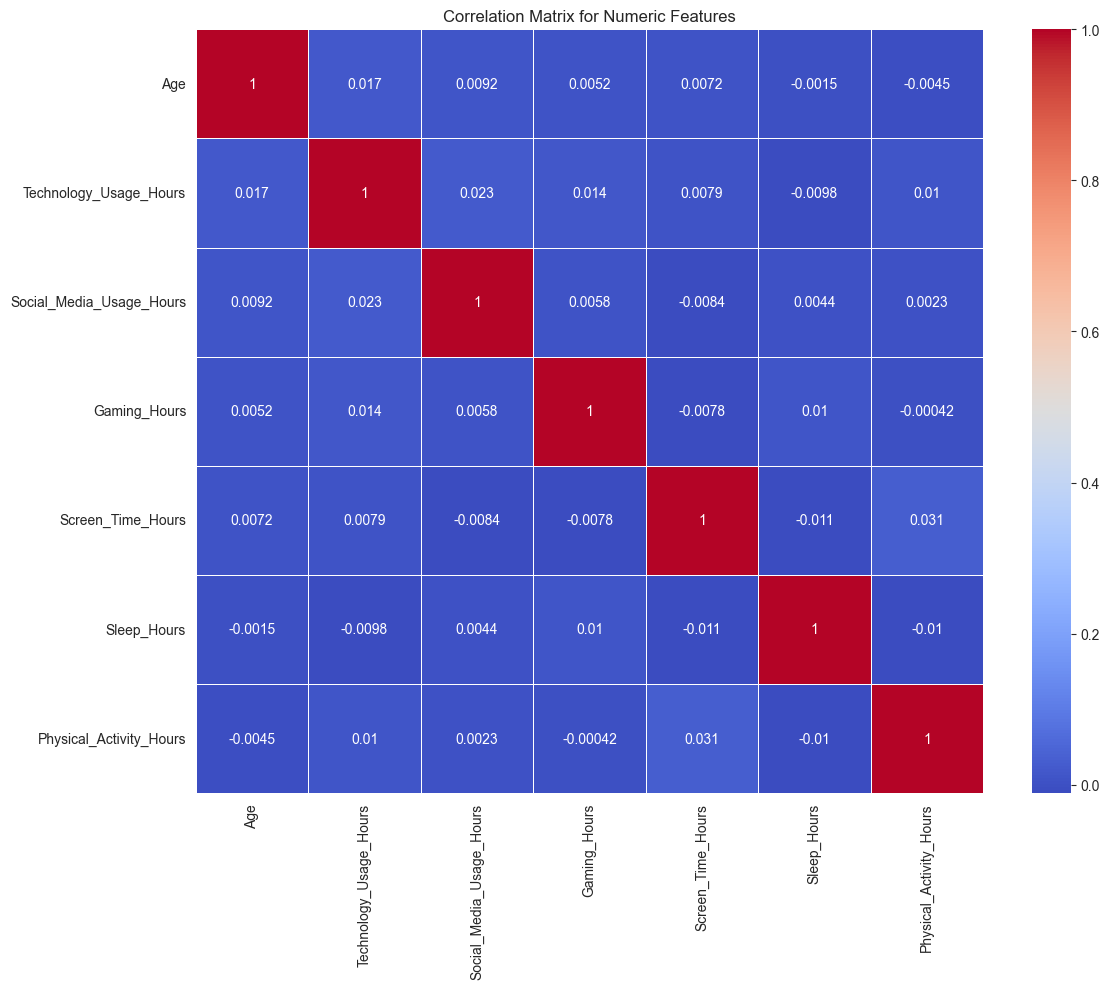

In [53]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.tight_layout()
plt.show()


### Функция для проведения теста хи-квадрат


In [54]:
def test_uniformity(data, feature, p_value=0.05):
    if data[feature].dtype in ['int64', 'float64']:
        # Для числовых признаков используем биннинг
        _, bin_edges = np.histogram(data[feature], bins='auto')
        observed, _ = np.histogram(data[feature], bins=bin_edges)
        n = len(data[feature])
        expected = np.array([n / len(observed)] * len(observed))
    else:
        # Для категориальных признаков используем частоты категорий
        observed = data[feature].value_counts().values
        n = len(data[feature])
        expected = np.array([n / len(observed)] * len(observed))
    
    chi2, p = stats.chisquare(observed, expected)
    
    return {
        'feature': feature,
        'chi2_statistic': chi2,
        'p_value': p,
        'is_uniform': p > p_value
    }   

### Проведение теста хи-квадрат для всех признаков
- H0: Распределение значений признака равномерно
- H1: Распределение значений признака не равномерно
- Уровень значимости: 0.05

In [55]:
# Проводим тест для всех признаков, кроме User_id
features_to_test = [col for col in data.columns if col != 'User_ID']
results = []

for feature in features_to_test:
    result = test_uniformity(data, feature)
    results.append(result)

In [56]:
# Создаем датафрейм с результатами
results_df = pd.DataFrame(results)

# Сортируем результаты по p-value
results_df = results_df.sort_values('p_value')

results_df

,feature,chi2_statistic,p_value,is_uniform
0,Age,386.0078,1.623409e-69,False
4,Gaming_Hours,35.3044,2.613755e-02,False
8,Sleep_Hours,25.0568,2.447124e-01,True
3,Social_Media_Usage_Hours,23.4200,3.220001e-01,True
1,Gender,1.0376,5.952344e-01,True
11,Work_Environment_Impact,0.8984,6.381385e-01,True
2,Technology_Usage_Hours,17.6340,6.720333e-01,True
5,Screen_Time_Hours,16.1160,7.630984e-01,True
12,Online_Support_Usage,0.0676,7.948638e-01,True
9,Physical_Activity_Hours,14.4616,8.489673e-01,True


### Визуализация результатов теста хи-квадрат


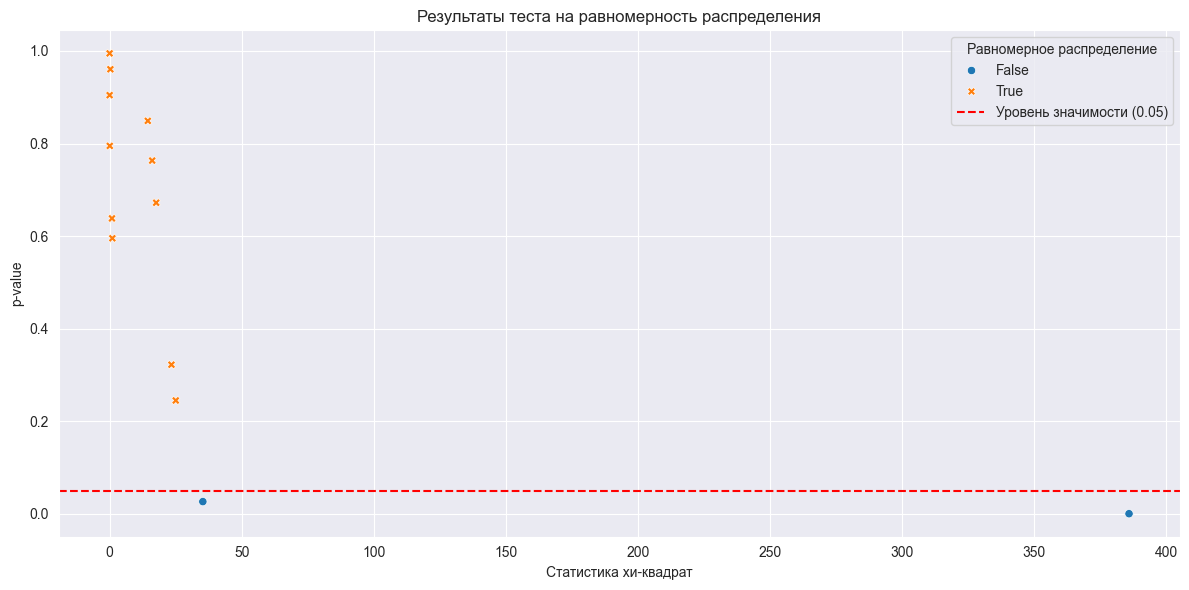

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results_df, x='chi2_statistic', y='p_value', hue='is_uniform', style='is_uniform')
plt.title('Результаты теста на равномерность распределения')
plt.xlabel('Статистика хи-квадрат')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Уровень значимости (0.05)')
plt.legend(title='Равномерное распределение')
plt.tight_layout()
plt.show()

### Функция для визуализации зависимостей между числовыми и категориальными признаками


In [58]:
def plot_boxplot(data, num_feature, cat_feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_feature, y=num_feature, data=data)
    plt.title(f'{num_feature} by {cat_feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Визуализация зависимостей между числовыми и категориальными признаками


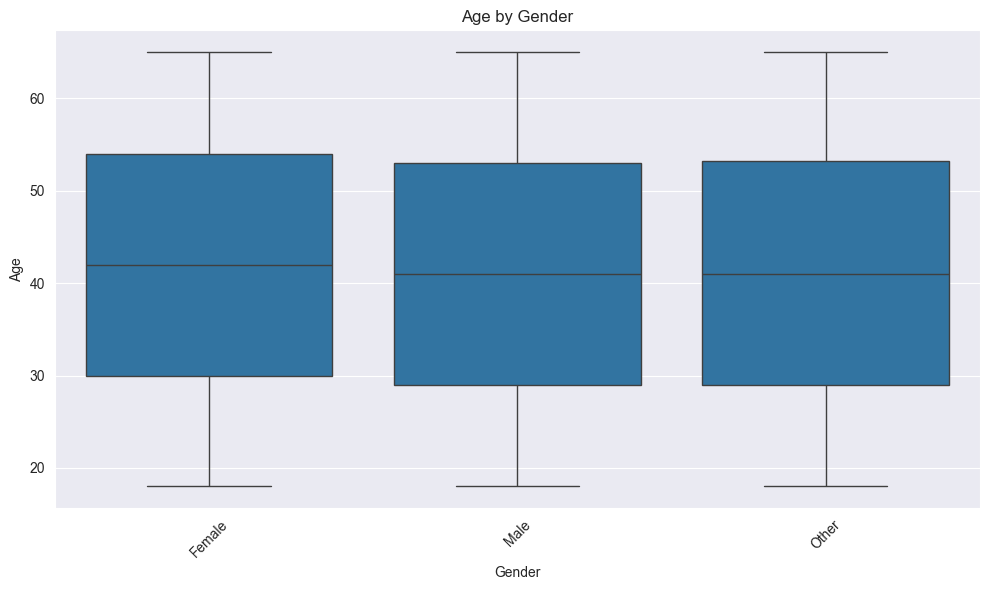

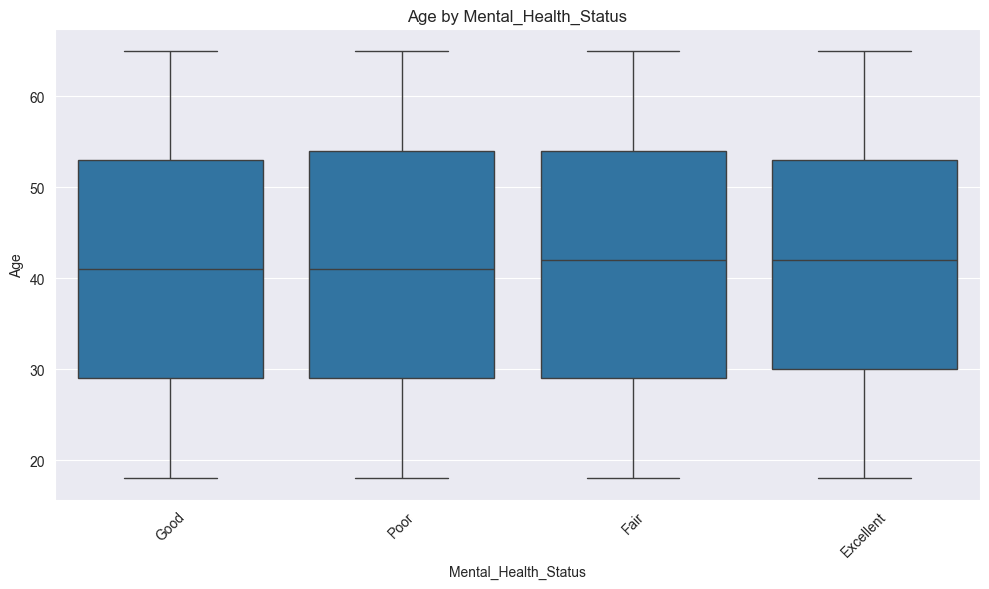

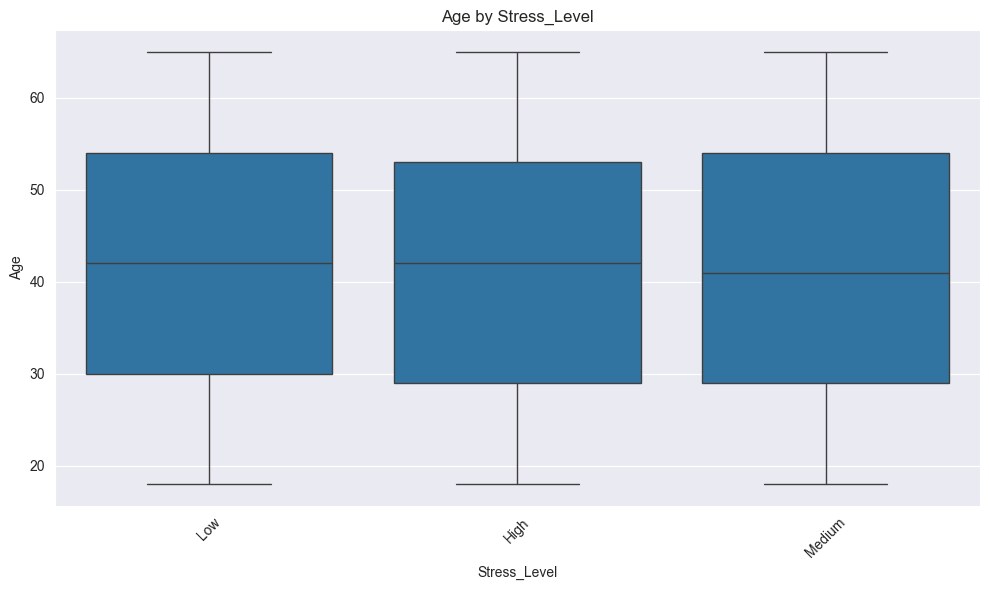

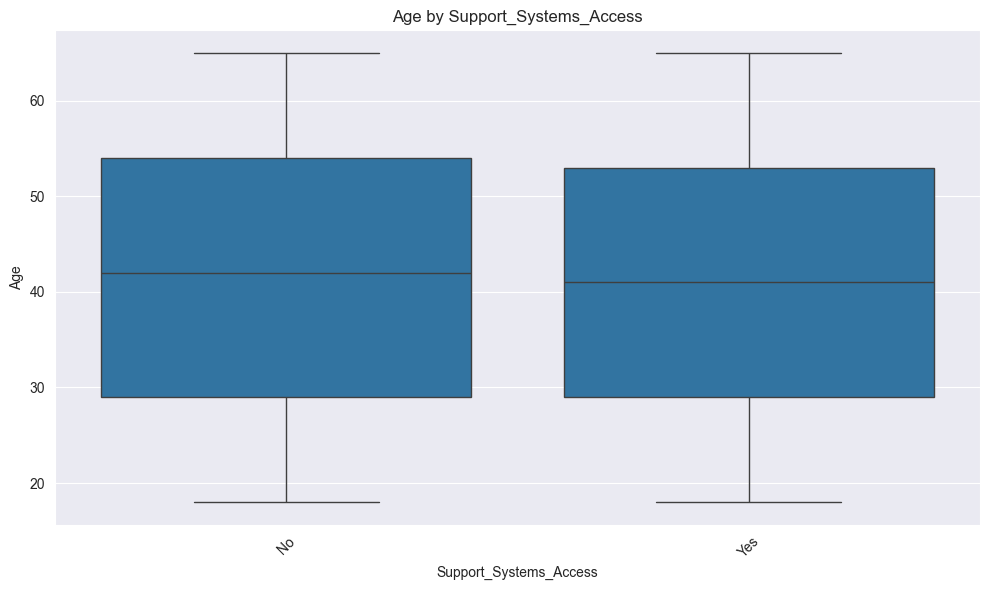

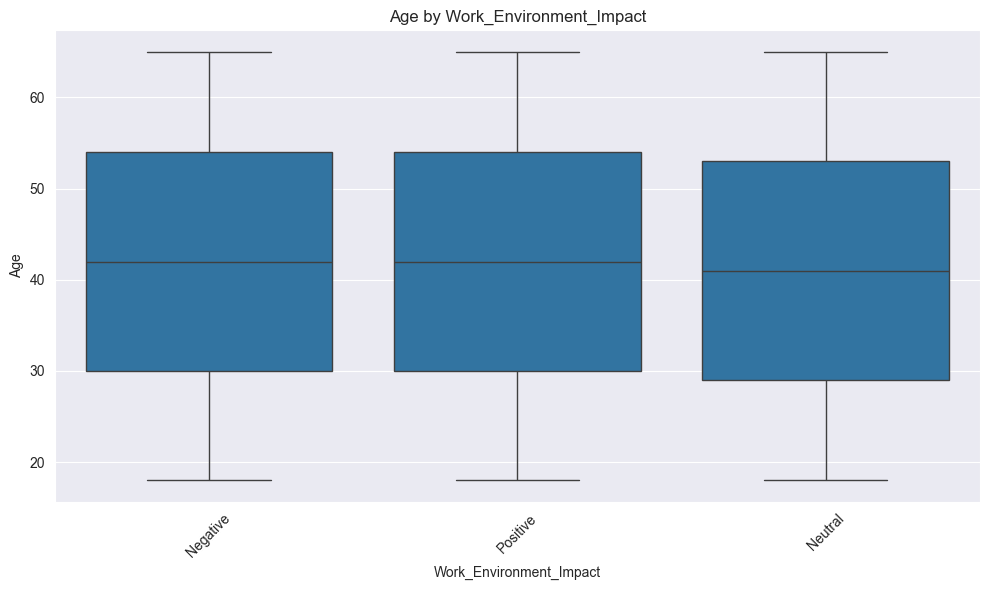

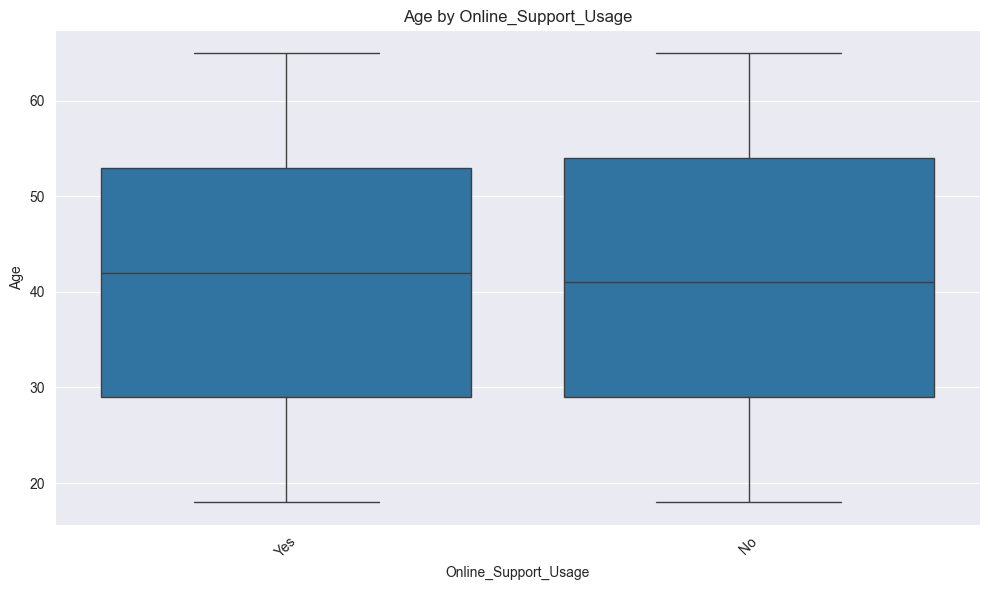

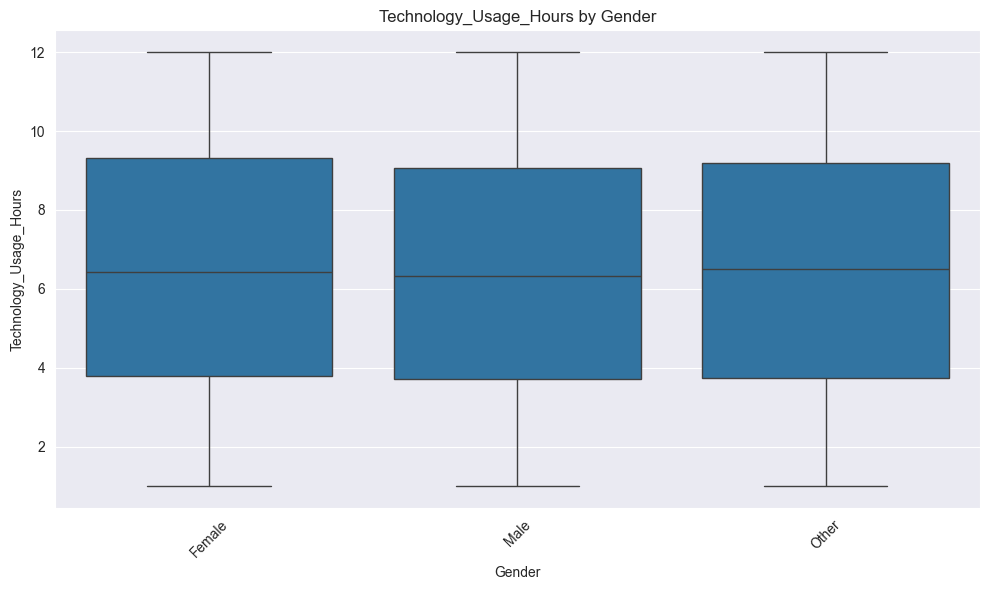

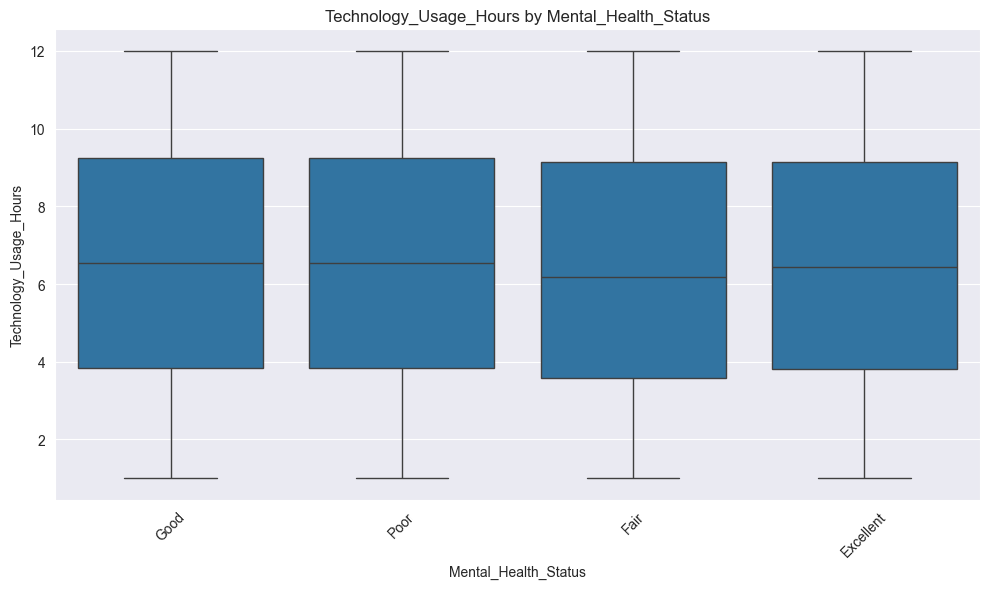

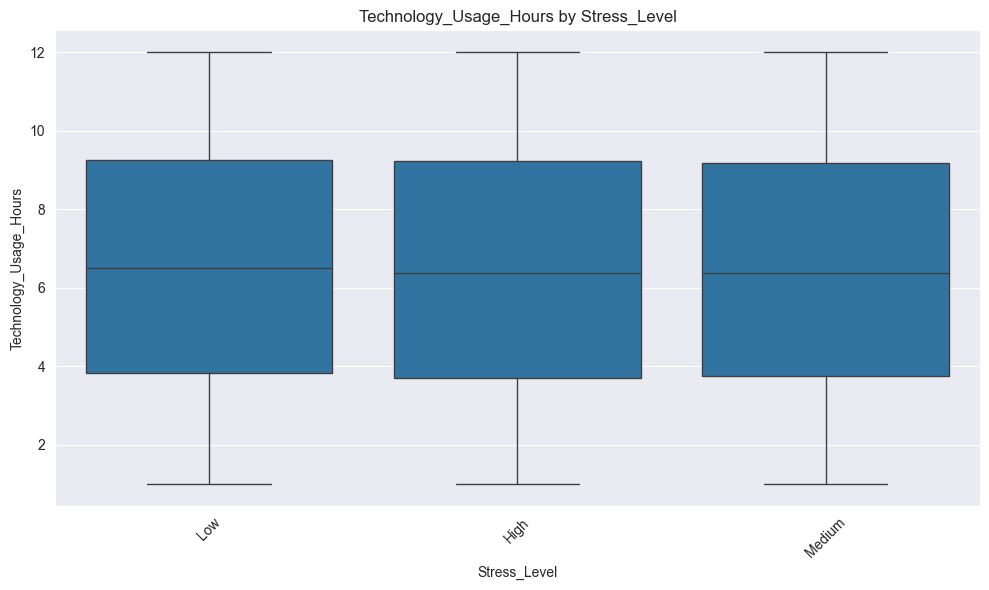

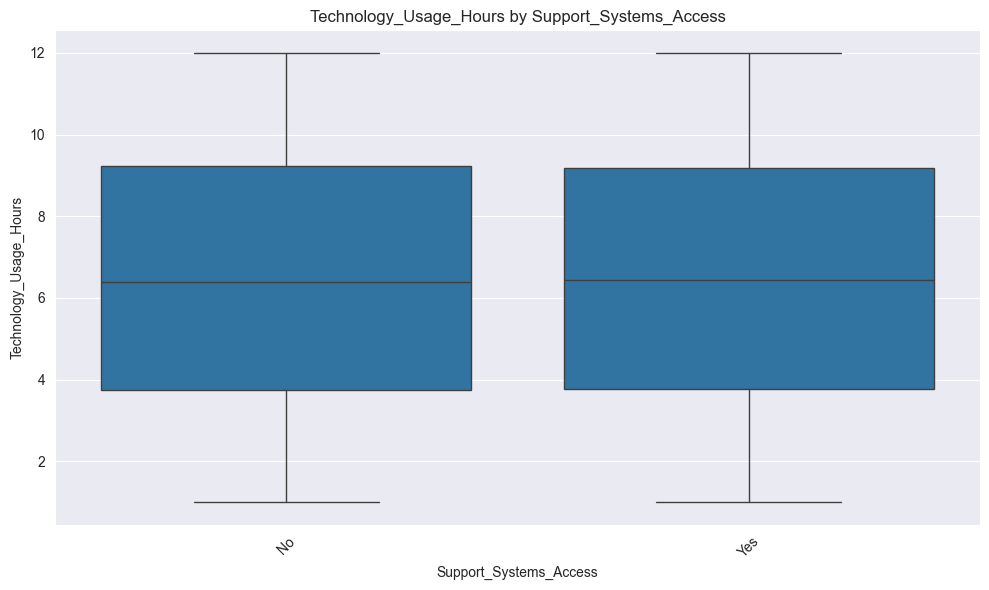

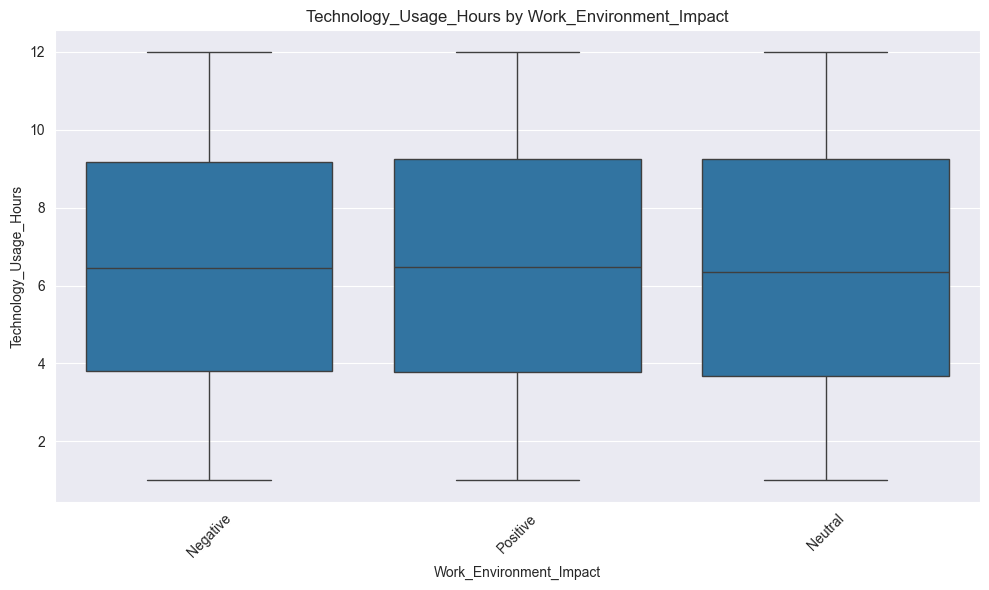

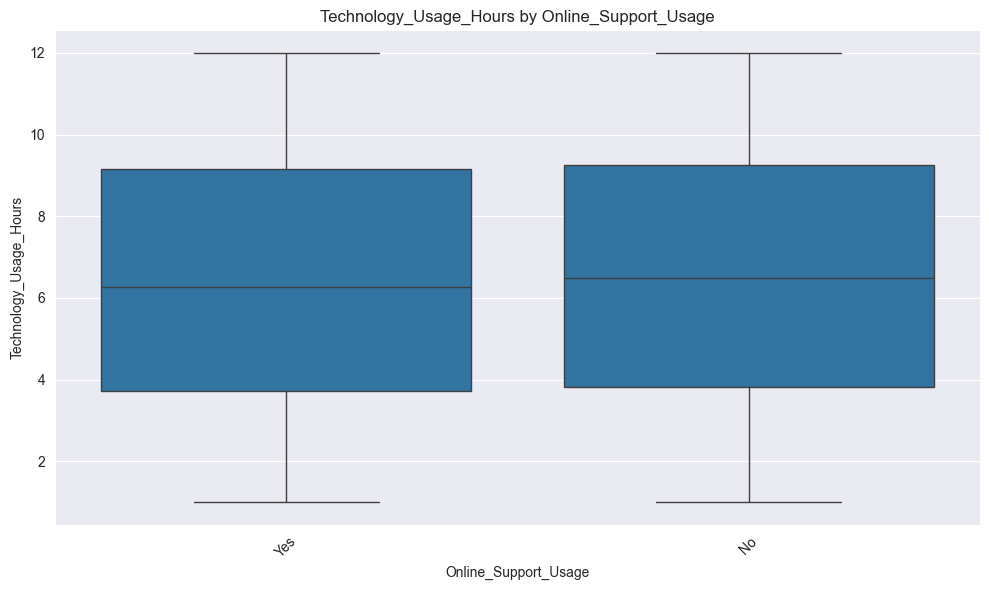

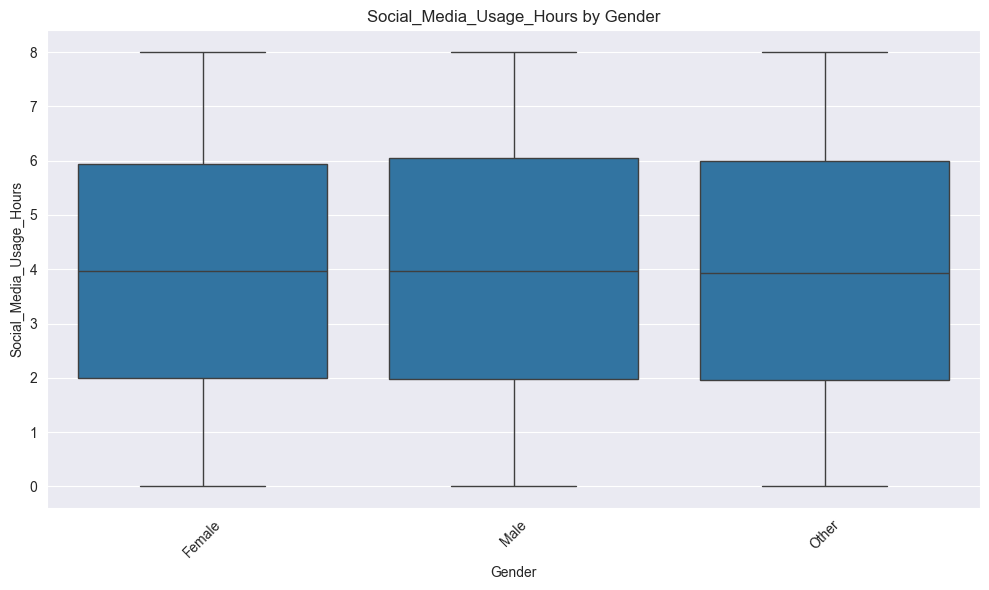

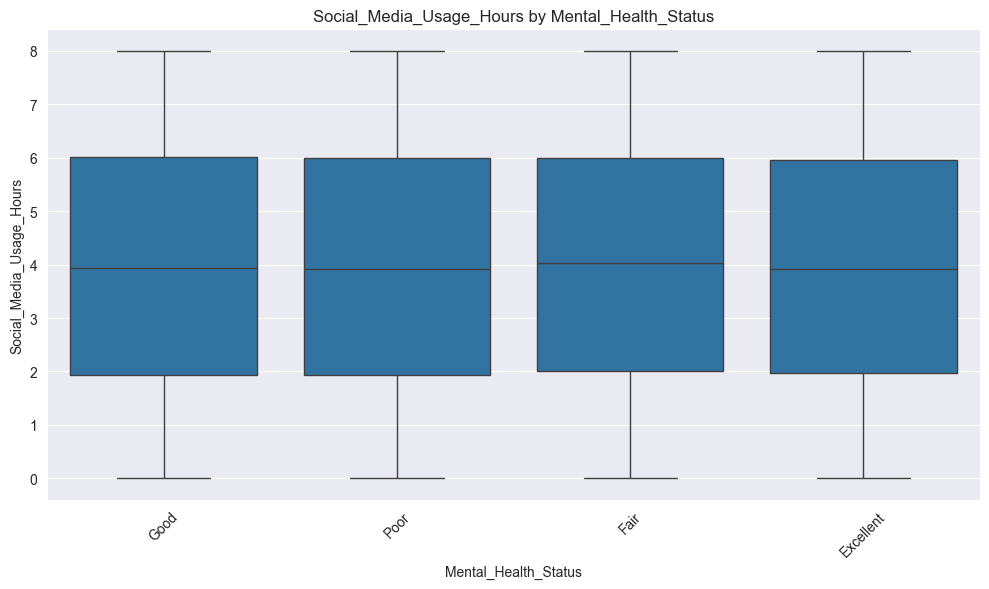

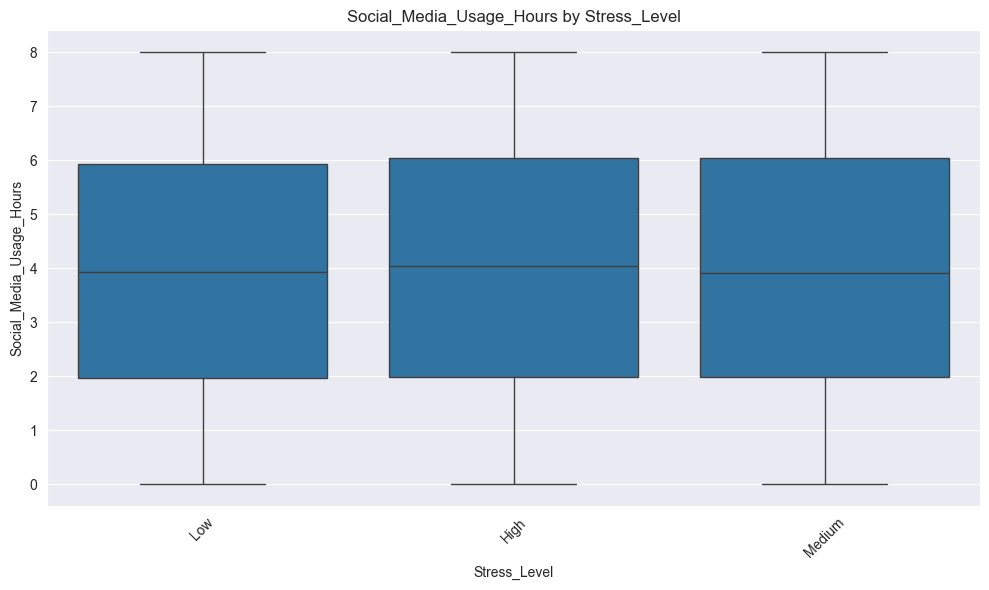

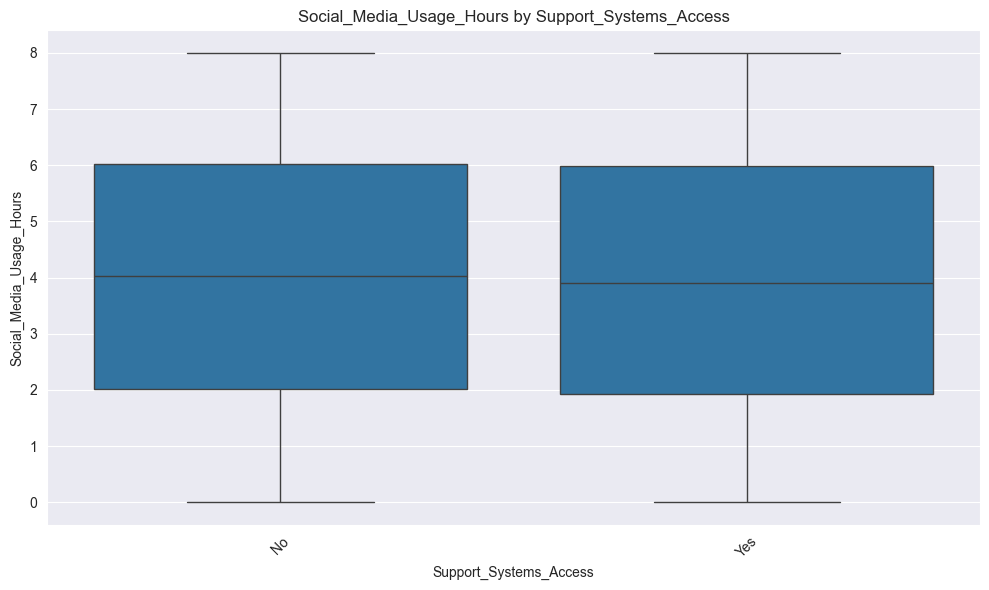

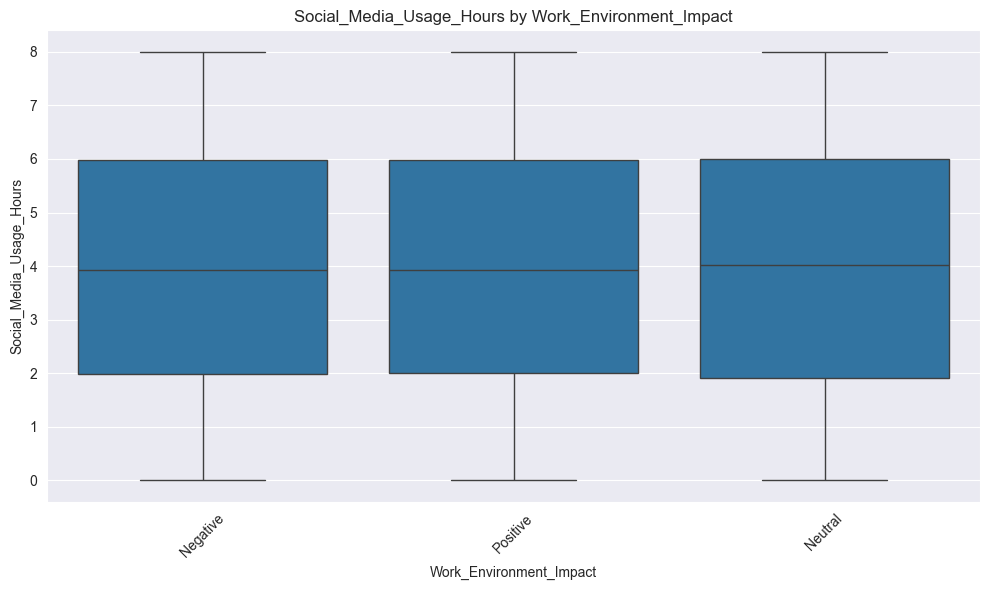

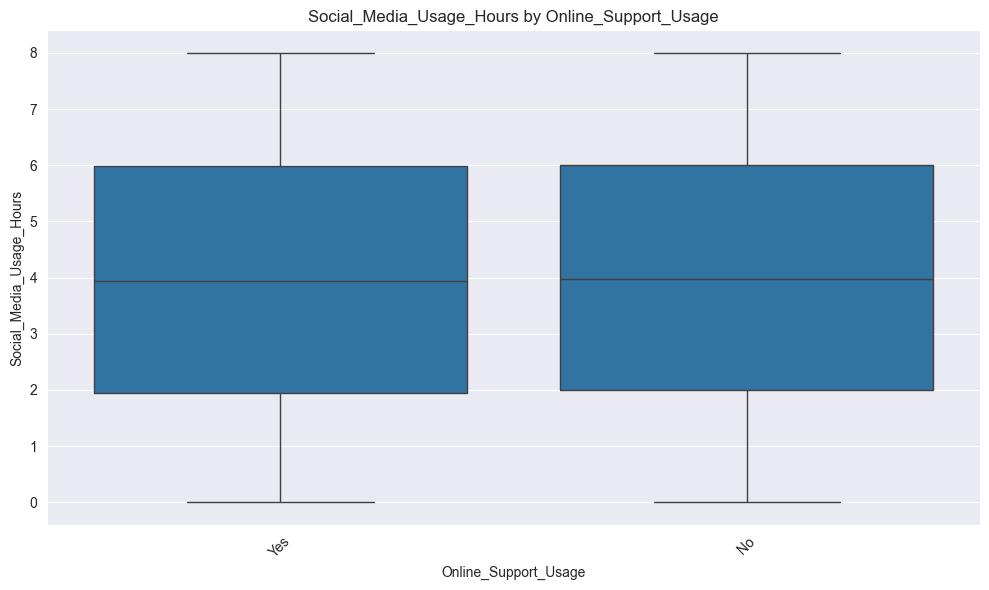

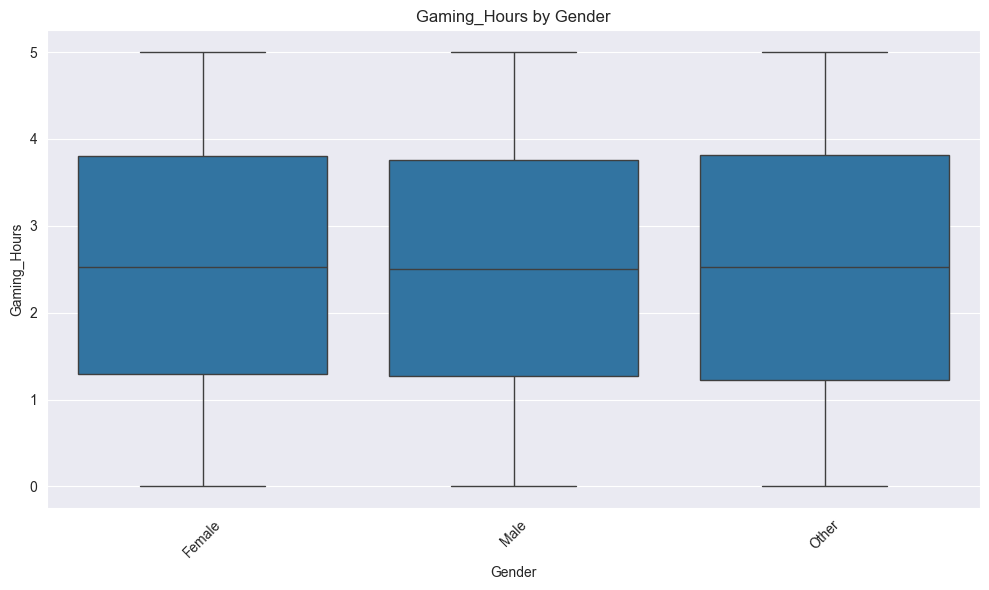

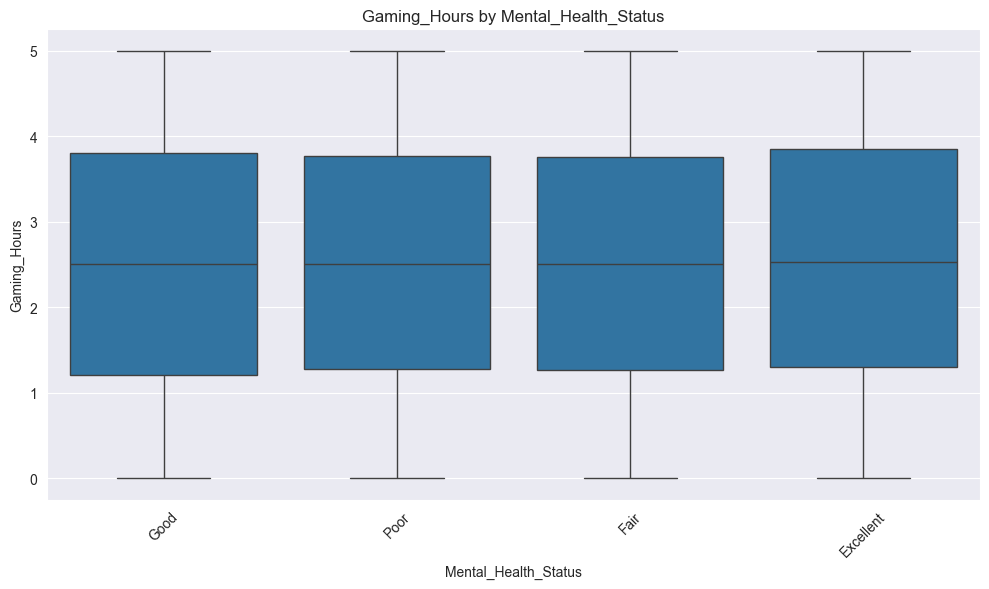

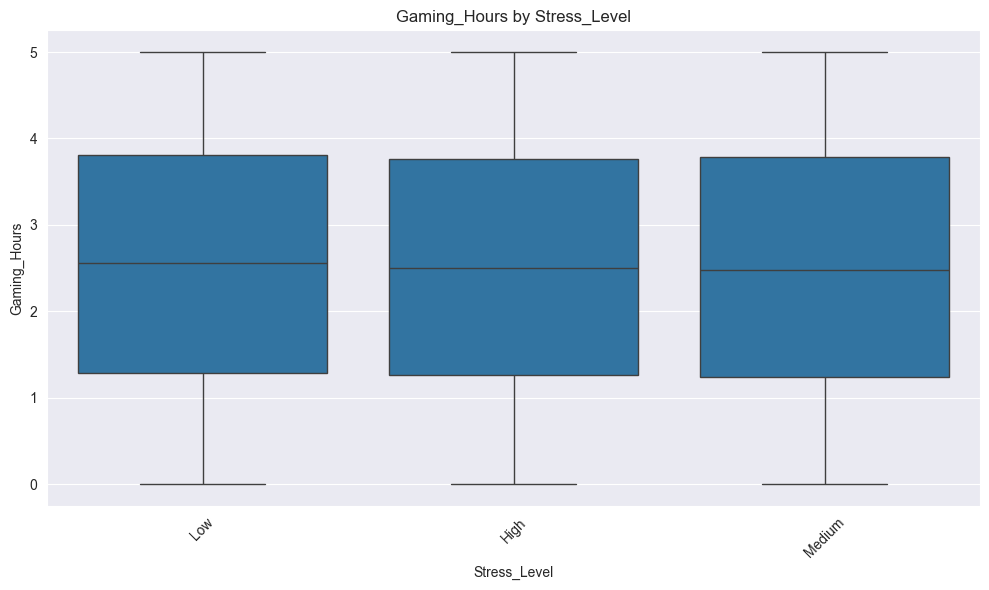

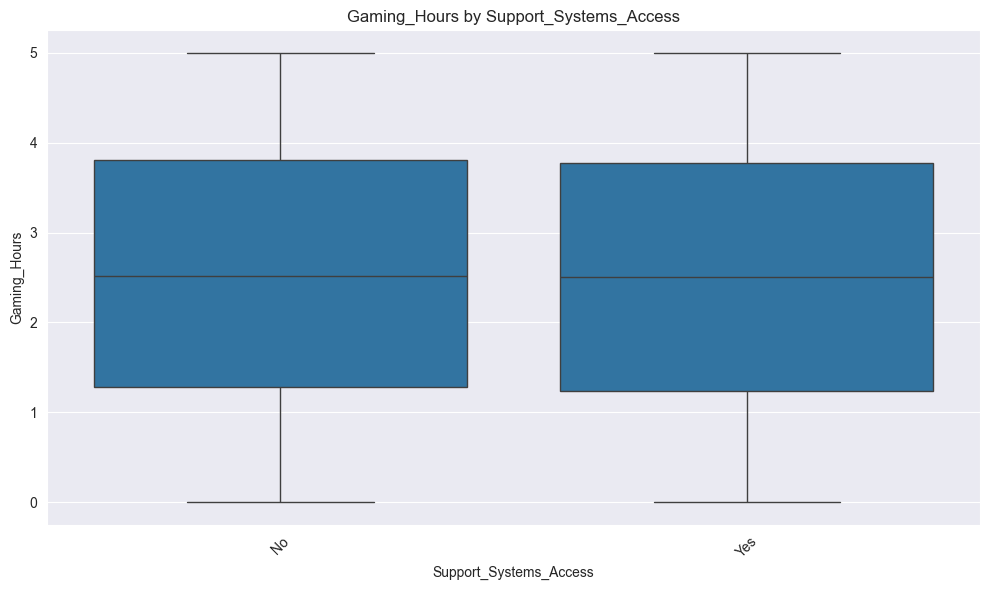

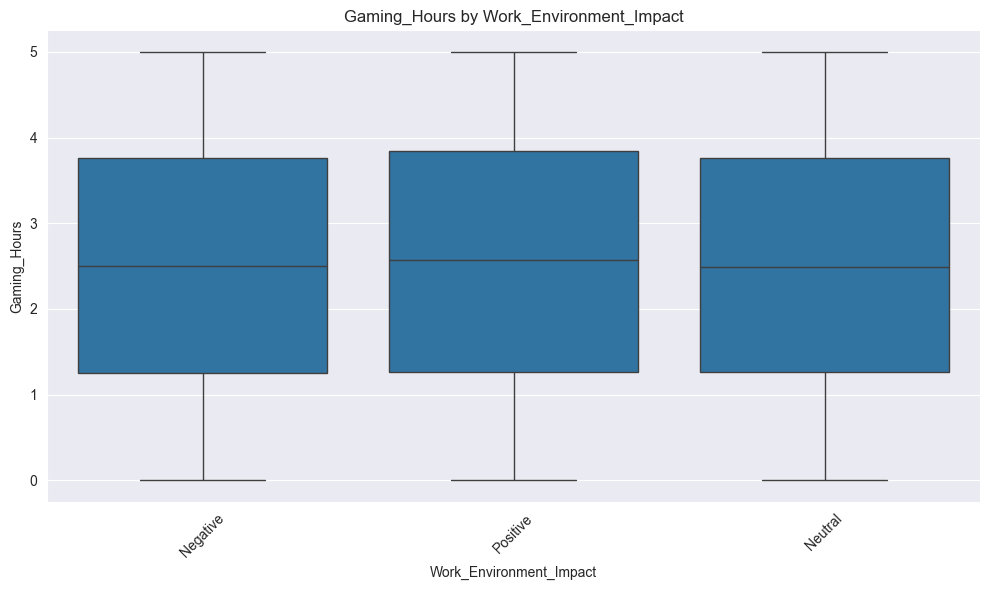

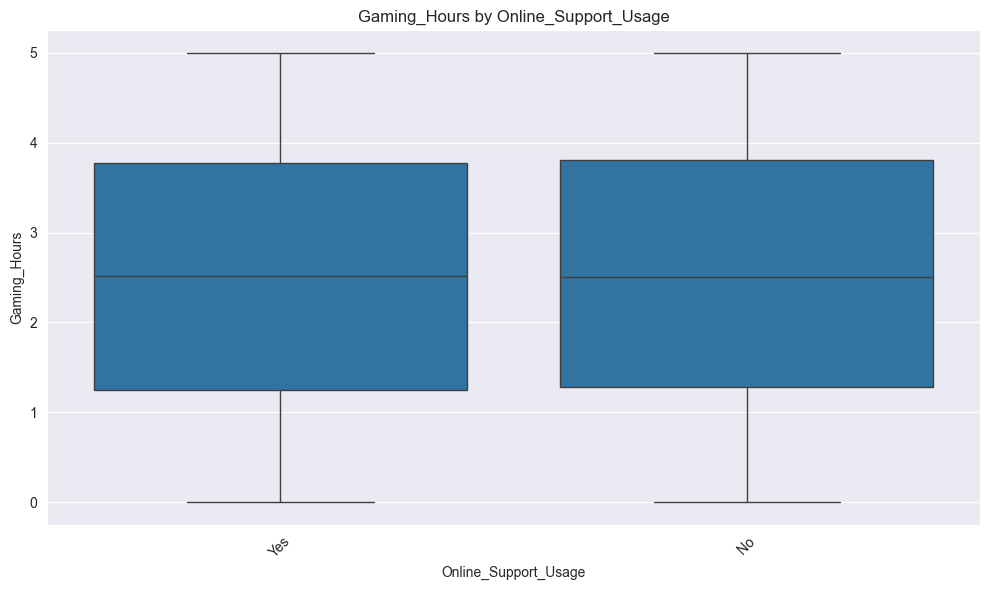

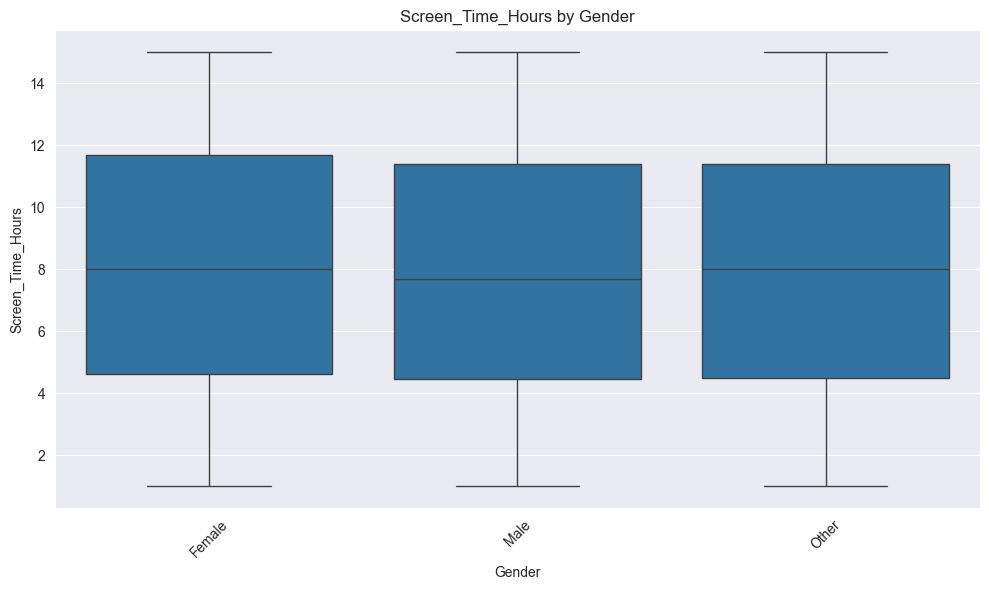

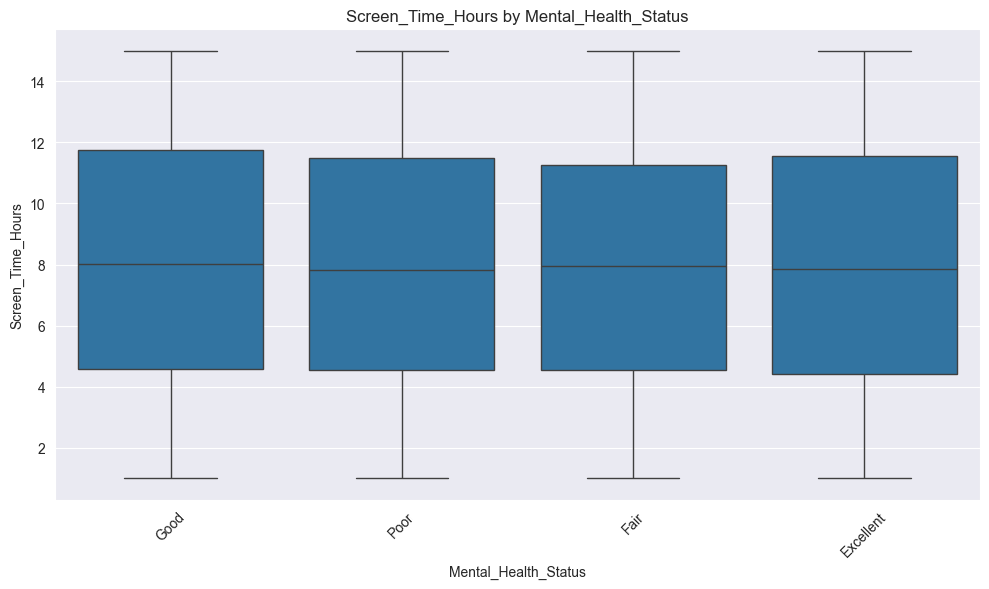

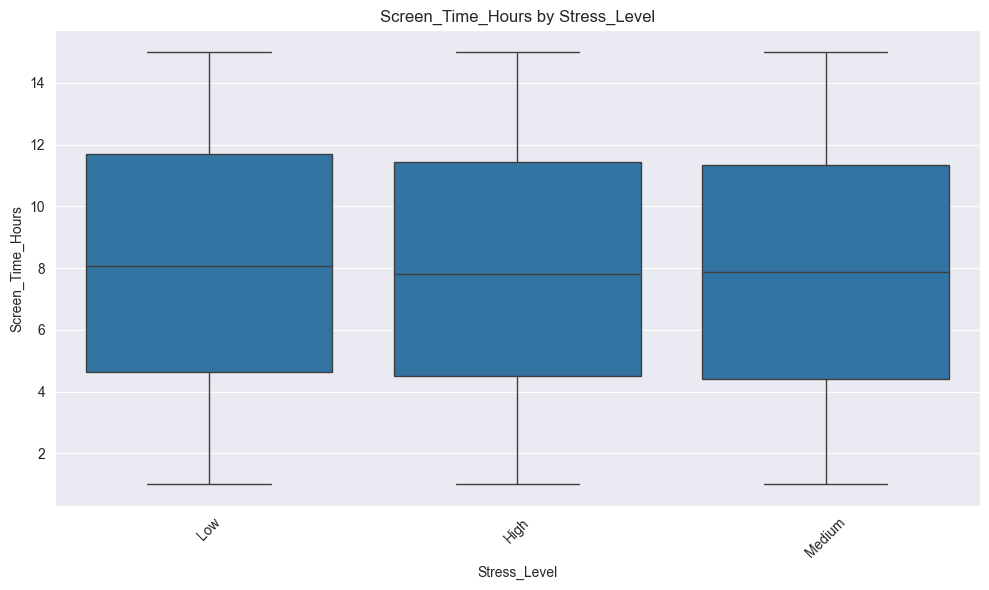

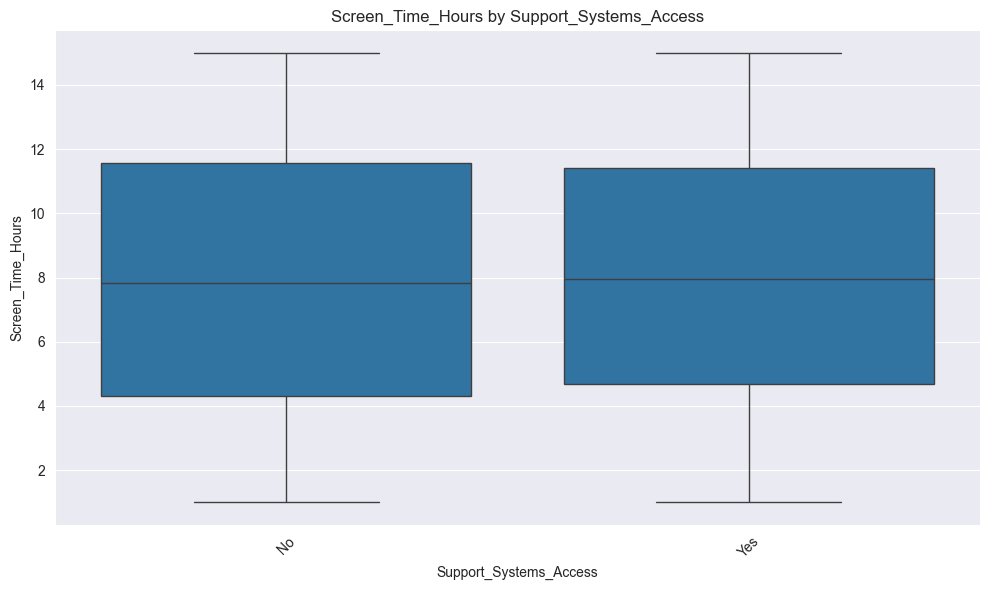

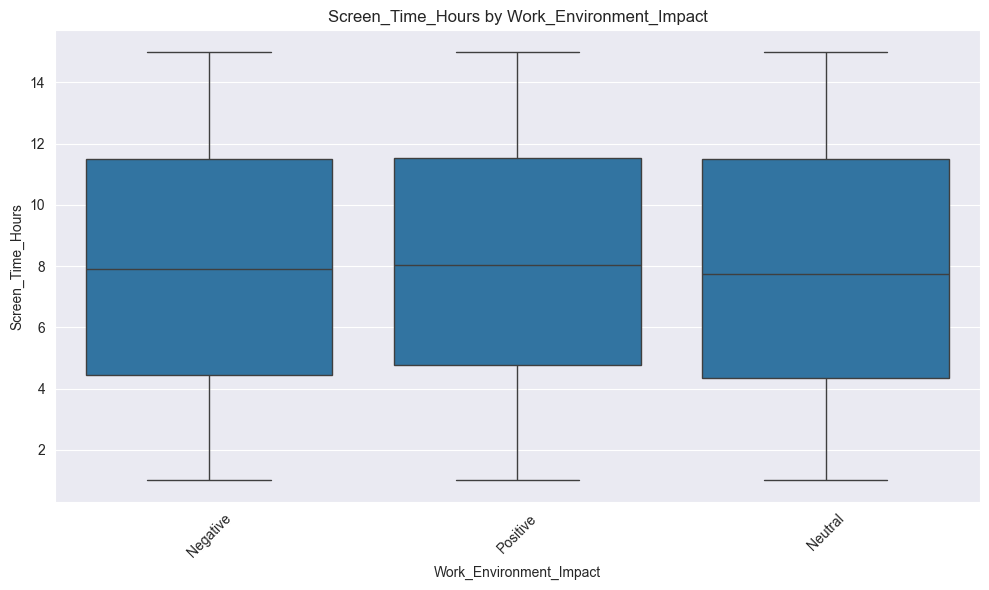

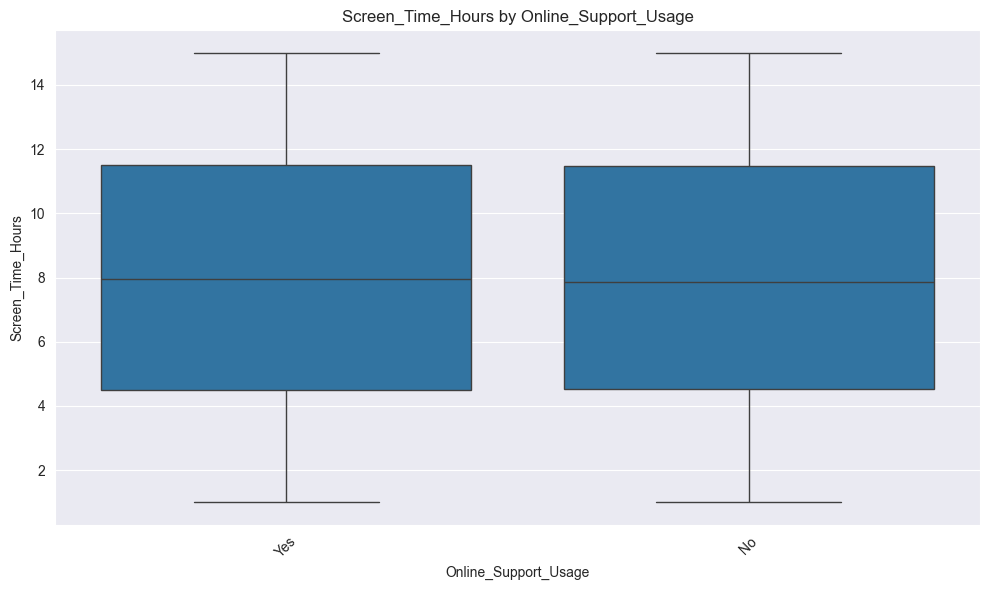

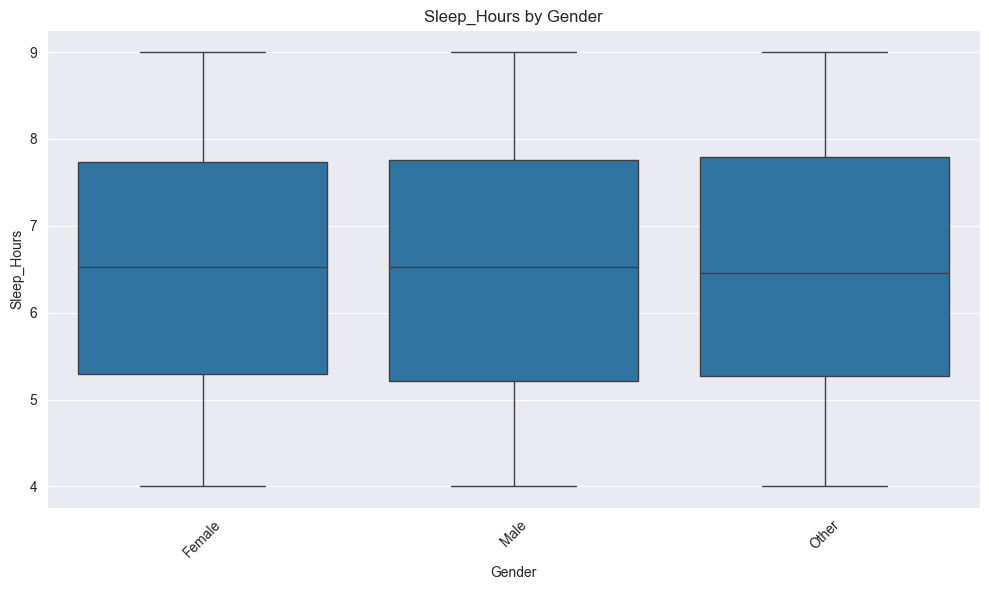

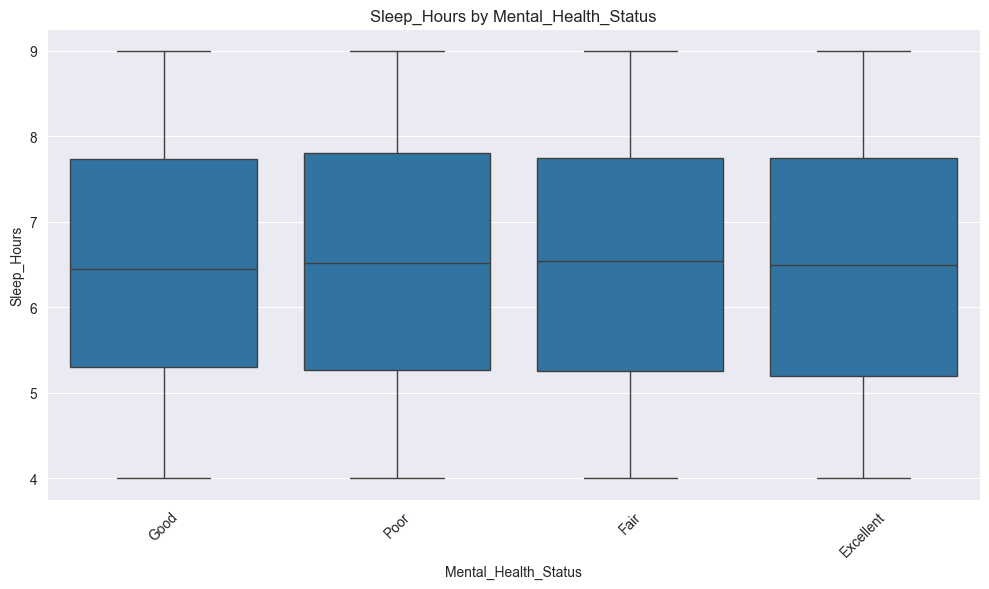

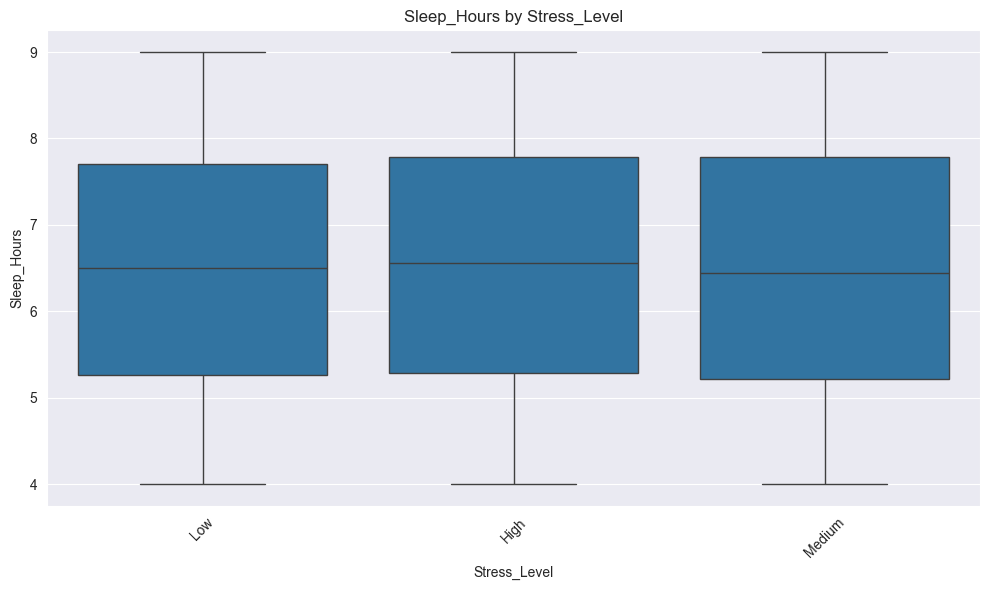

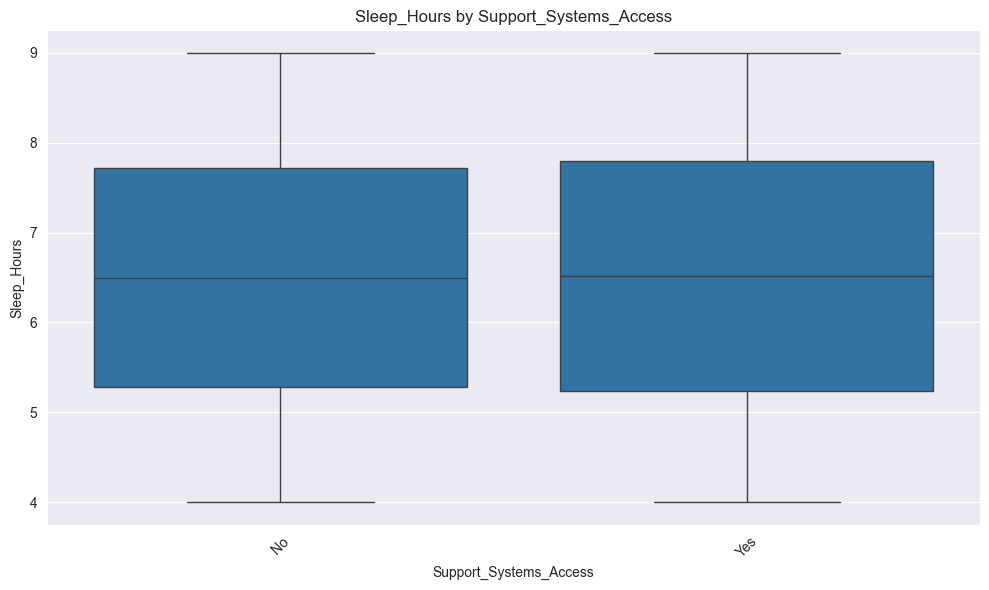

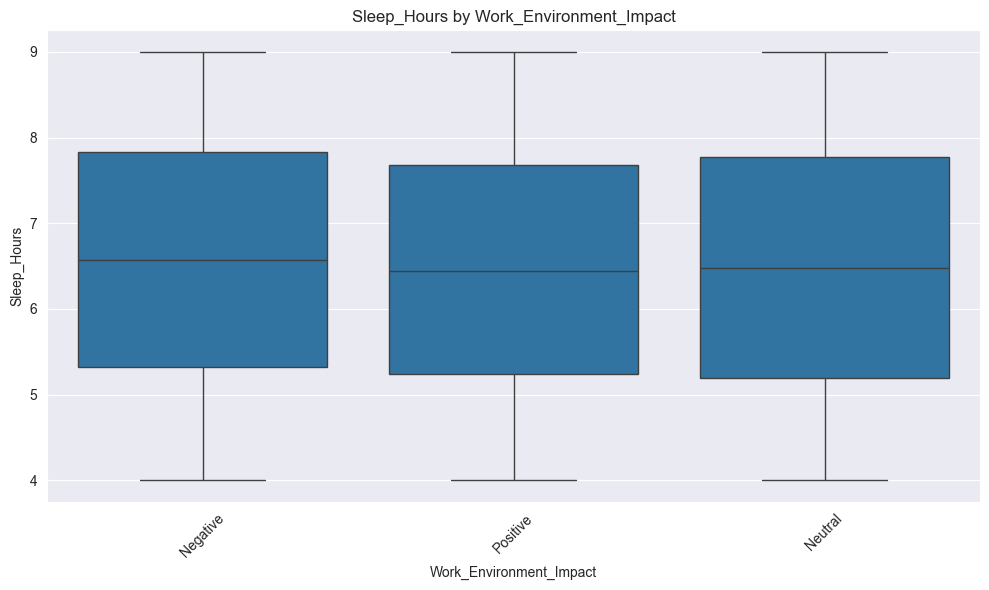

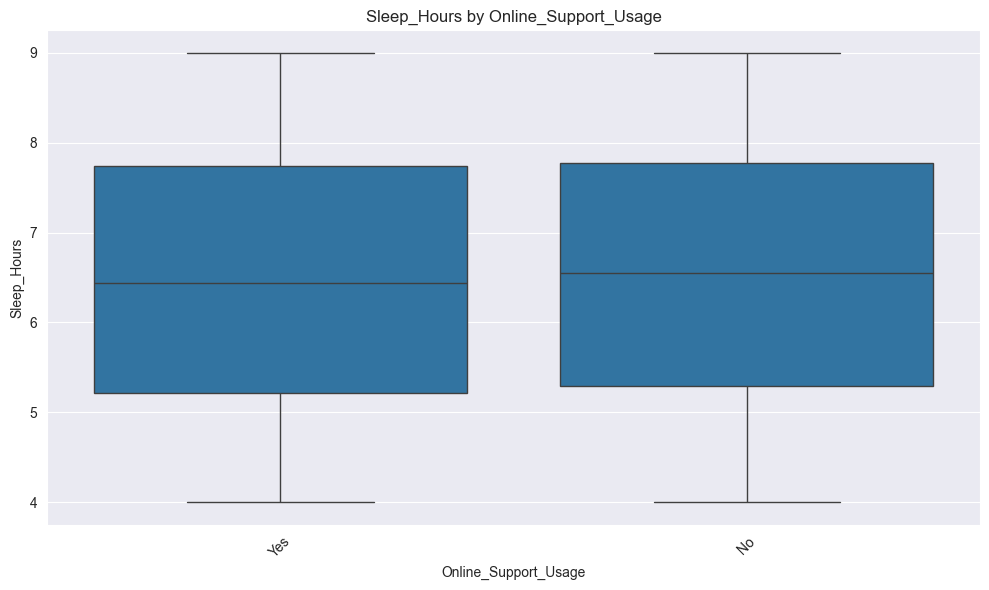

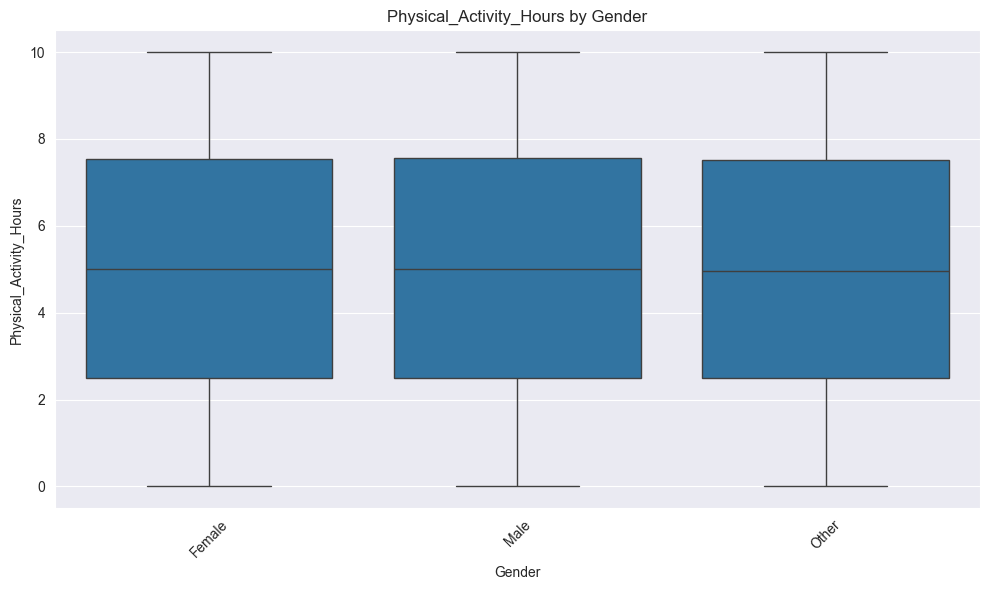

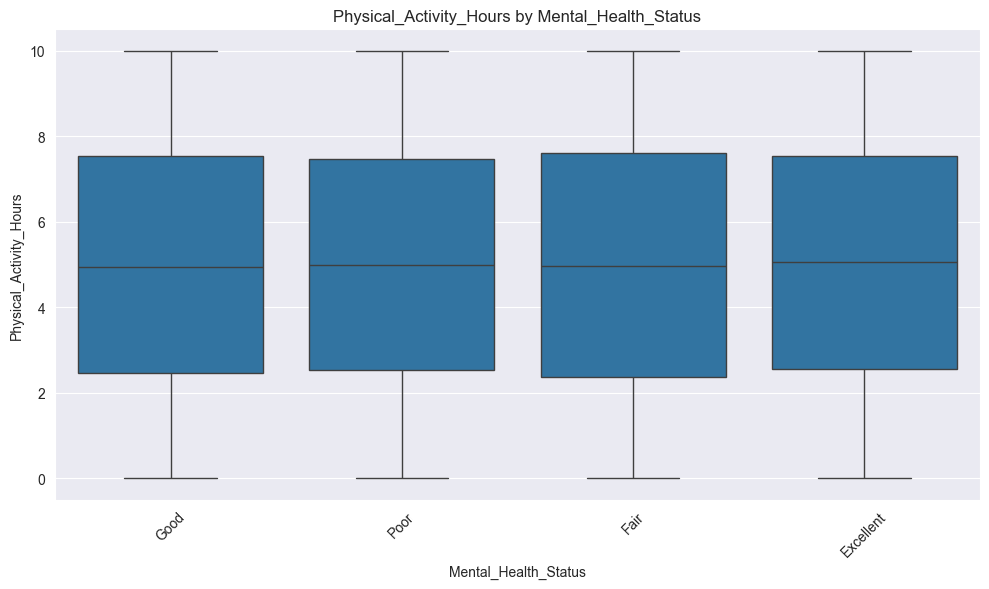

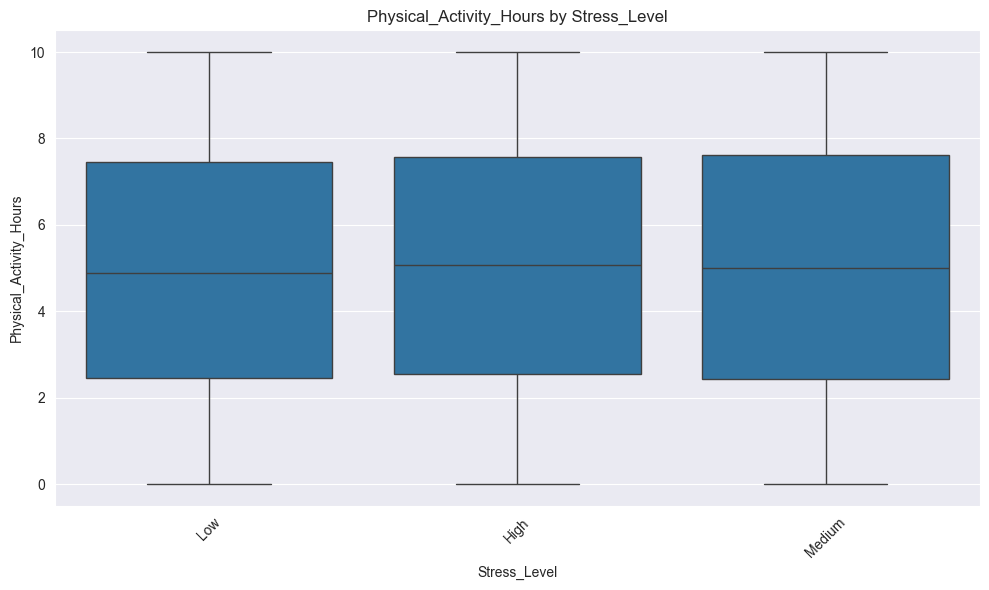

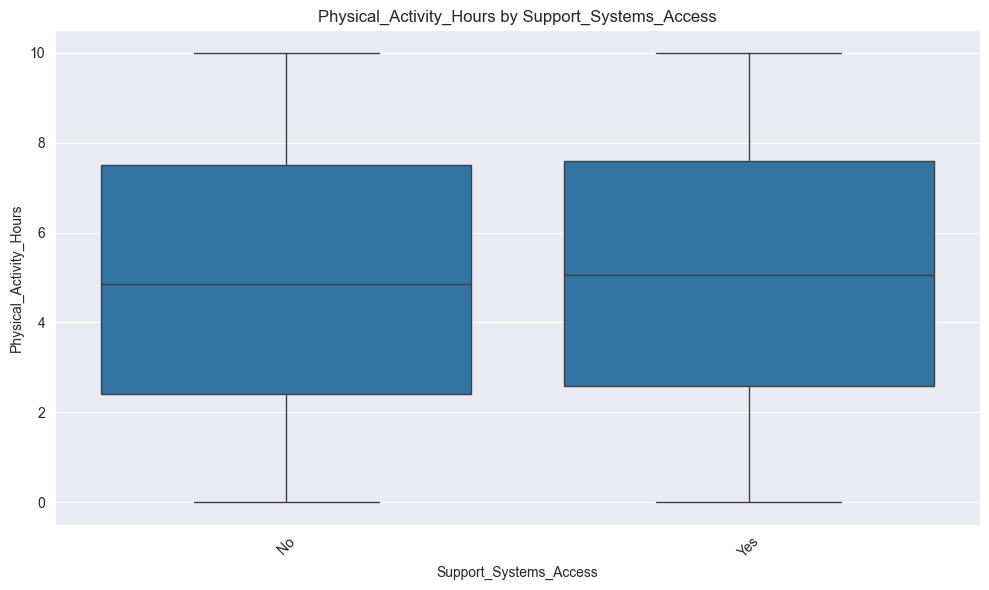

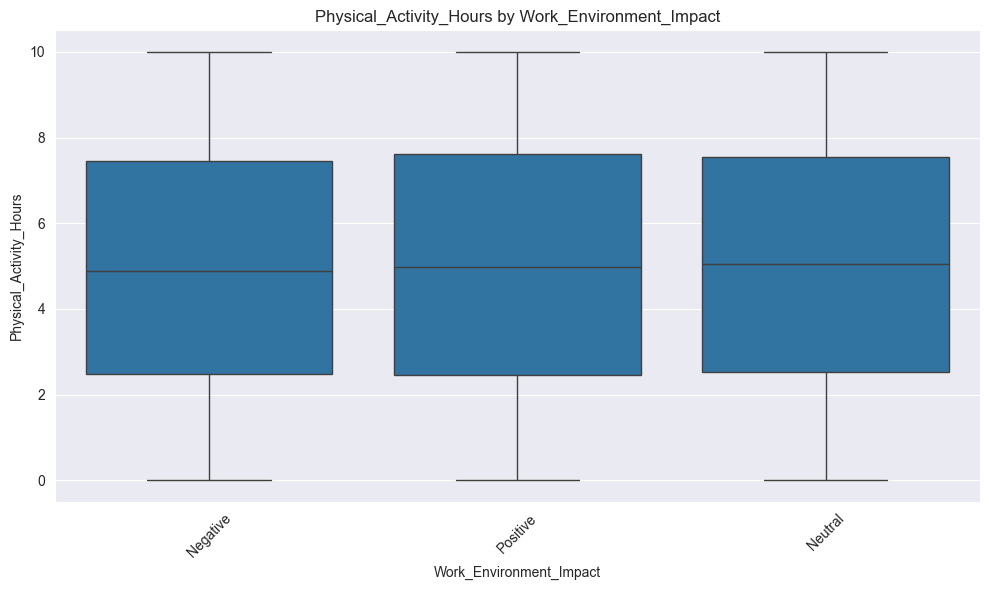

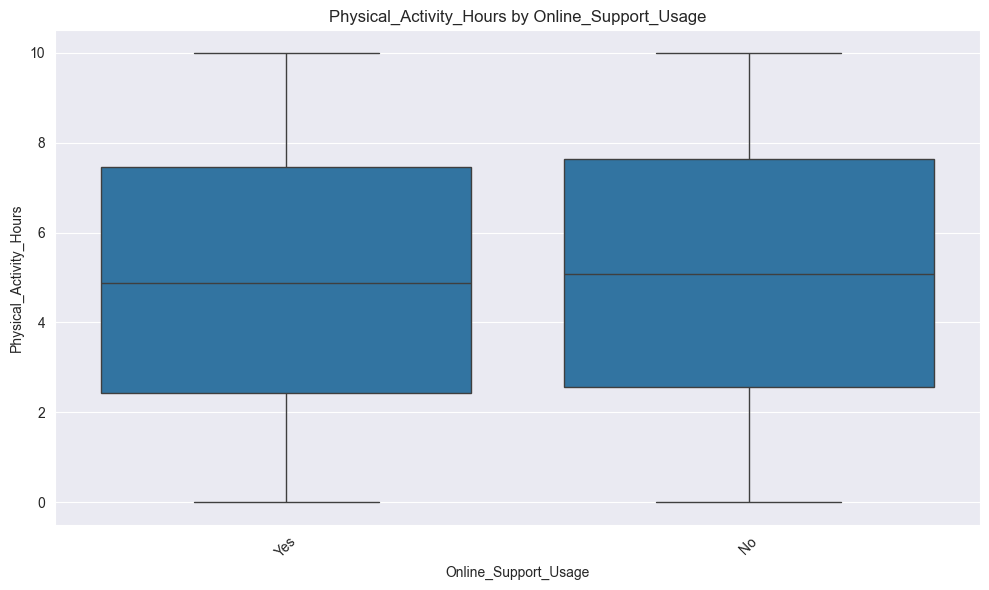

In [59]:
categorical_features = data.select_dtypes(include=['object']).drop('User_ID', axis=1).columns
for num_feature in numeric_features:
    for cat_feature in categorical_features:
        plot_boxplot(data, num_feature, cat_feature)

### Проверка равномерности зависимостей между числовыми и категориальными признаками
- H0: Зависимость между числовым и категориальным признаком равномерна
- H1: Зависимость между числовым и категориальным признаком не равномерна
- Уровень значимости: 0.05

In [60]:
def test_uniformity_numeric_vs_categorical(data, numeric_feature, categorical_feature, p_value=0.05):
    groups = [group for _, group in data.groupby(categorical_feature)[numeric_feature]]
    f_statistic, p = stats.f_oneway(*groups)
    
    df_between = len(groups) - 1
    df_within = sum(len(group) - 1 for group in groups)
    eta_squared = (df_between * f_statistic) / (df_between * f_statistic + df_within)
    effect_size = np.sqrt(eta_squared)
    
    return {
        'numeric_feature': numeric_feature,
        'categorical_feature': categorical_feature,
        'f_statistic': f_statistic,
        'p_value': p,
        'is_uniform': p > p_value,
        'effect_size': effect_size
    }

### Определяем числовые и категориальные признаки


In [61]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

numeric_features = [col for col in numeric_features if col != 'User_ID']
categorical_features = [col for col in categorical_features if col != 'User_ID']

### Проводим тест для всех комбинаций числовых и категориальных признаков


In [62]:
dependency_results = []

for num_feature in numeric_features:
    for cat_feature in categorical_features:
        result = test_uniformity_numeric_vs_categorical(data, num_feature, cat_feature)
        dependency_results.append(result)

# Создаем датафрейм с результатами
dependency_df = pd.DataFrame(dependency_results)
dependency_df

,numeric_feature,categorical_feature,f_statistic,p_value,is_uniform,effect_size
0,Age,Gender,2.243282,0.106163,True,0.021180
1,Age,Mental_Health_Status,1.610324,0.184673,True,0.021979
2,Age,Stress_Level,0.494859,0.609672,True,0.009949
3,Age,Support_Systems_Access,0.034823,0.851971,True,0.001866
4,Age,Work_Environment_Impact,3.943873,0.019403,False,0.028078
5,Age,Online_Support_Usage,0.109437,0.740793,True,0.003308
6,Technology_Usage_Hours,Gender,0.768236,0.463858,True,0.012396
7,Technology_Usage_Hours,Mental_Health_Status,2.415171,0.064536,True,0.026913
8,Technology_Usage_Hours,Stress_Level,0.962224,0.382078,True,0.013873
9,Technology_Usage_Hours,Support_Systems_Access,0.034030,0.853648,True,0.001845


### Визуализация результатов теста для числовых и категориальных признаков

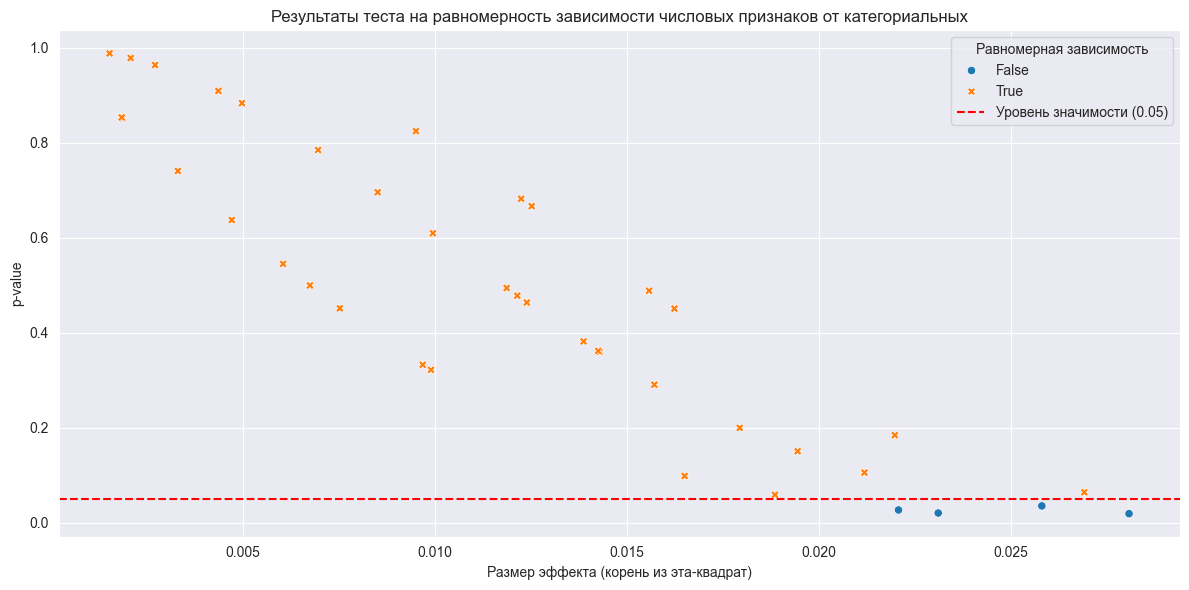

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dependency_df, x='effect_size', y='p_value', hue='is_uniform', style='is_uniform')
plt.title('Результаты теста на равномерность зависимости числовых признаков от категориальных')
plt.xlabel('Размер эффекта (корень из эта-квадрат)')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Уровень значимости (0.05)')
plt.legend(title='Равномерная зависимость')
plt.tight_layout()
plt.show()

### Функция для визуализации зависимости


In [64]:
def plot_dependency(data, numeric_feature, categorical_feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_feature, y=numeric_feature, data=data)
    plt.title(f'Зависимость {numeric_feature} от {categorical_feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Визуализация наиболее значимых зависимостей


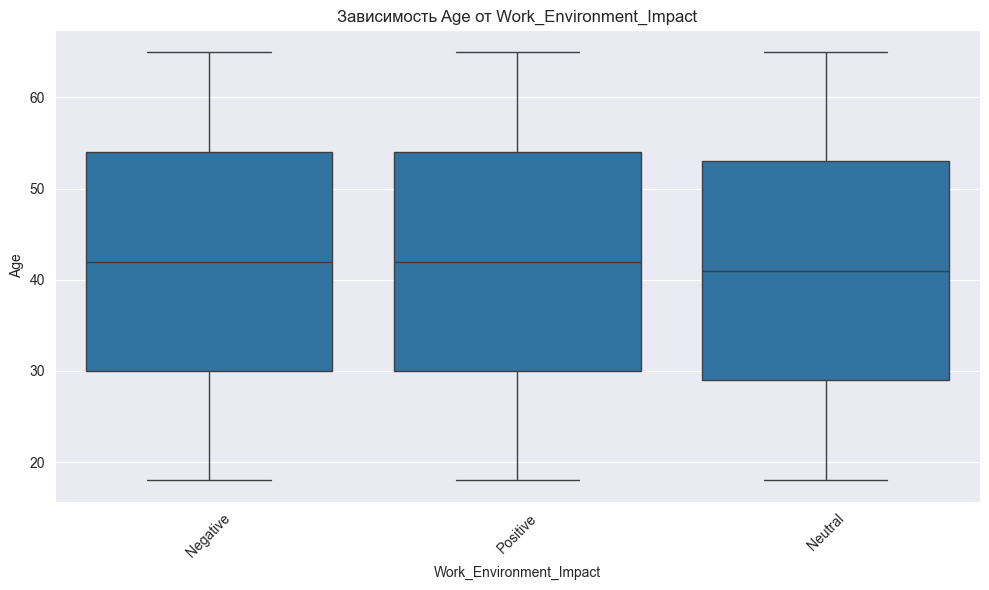

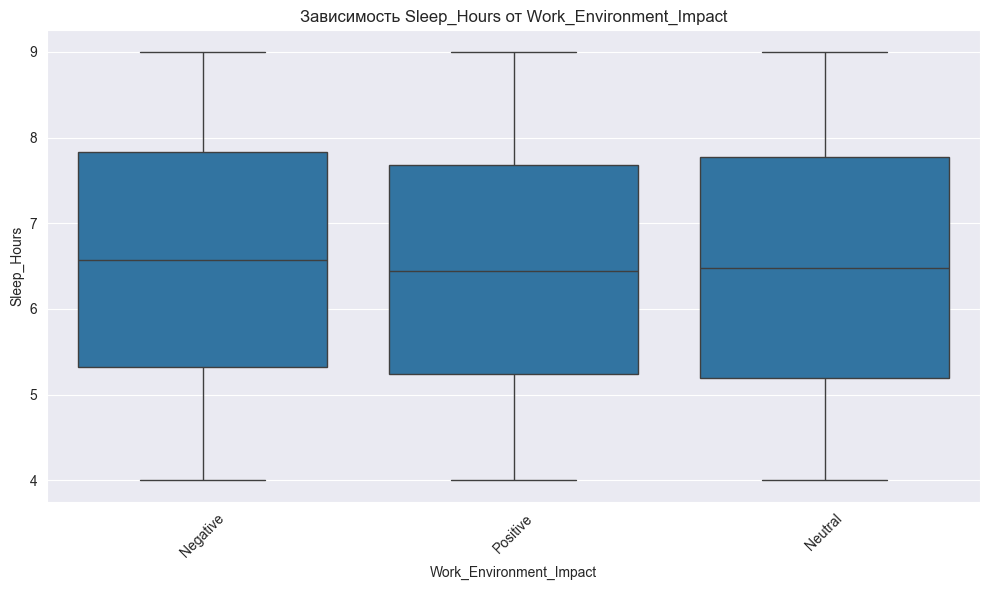

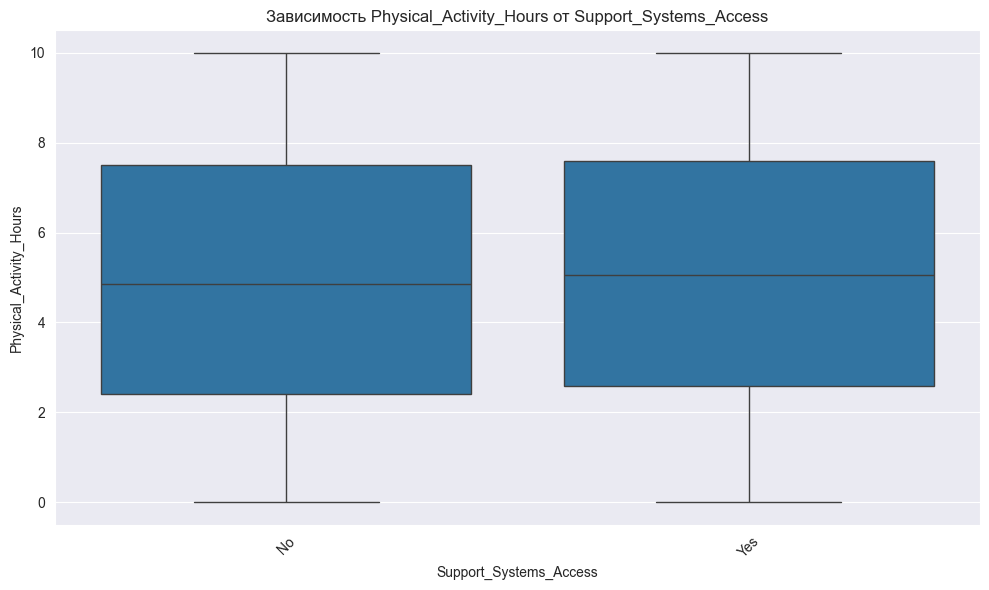

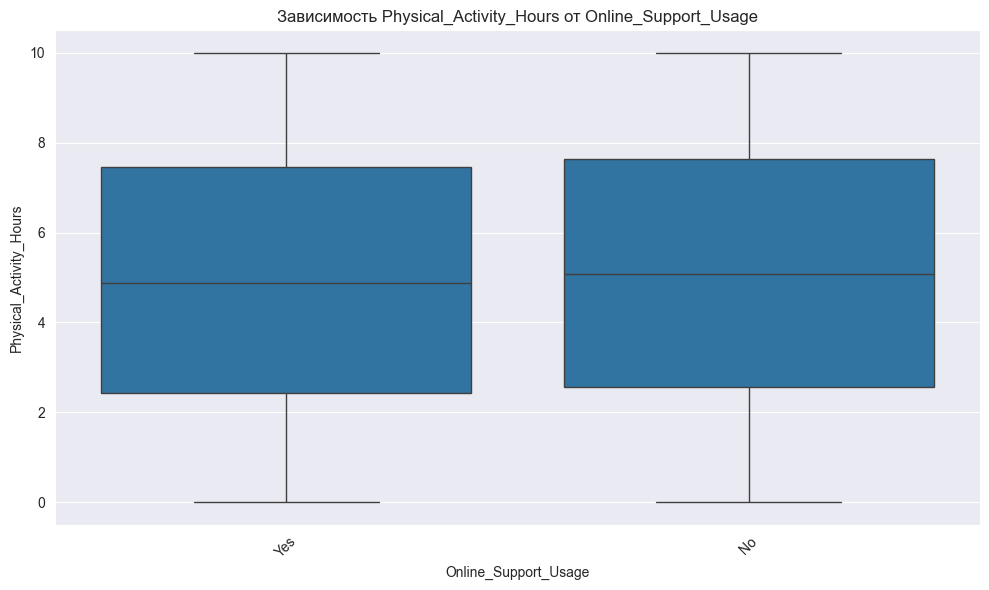

In [65]:
top_dependencies = dependency_df[dependency_df['is_uniform'] == False].head(5)
for _, row in top_dependencies.iterrows():
    plot_dependency(data, row['numeric_feature'], row['categorical_feature'])

### Сравнение результатов с предыдущим анализом


In [66]:
for feature in results_df['feature']:
    if feature in numeric_features:
        prev_result = results_df[results_df['feature'] == feature]['is_uniform'].values[0]
        curr_results = dependency_df[dependency_df['numeric_feature'] == feature]['is_uniform'].values
        
        if prev_result != all(curr_results):
            print(f"Несоответствие для признака {feature}:")
            print(f"  Предыдущий результат: {'равномерное' if prev_result else 'неравномерное'} распределение")
            print(f"  Текущий результат: {'все' if all(curr_results) else 'не все'} зависимости равномерны")


Несоответствие для признака Gaming_Hours:
  Предыдущий результат: неравномерное распределение
  Текущий результат: все зависимости равномерны
Несоответствие для признака Sleep_Hours:
  Предыдущий результат: равномерное распределение
  Текущий результат: не все зависимости равномерны
Несоответствие для признака Physical_Activity_Hours:
  Предыдущий результат: равномерное распределение
  Текущий результат: не все зависимости равномерны


### Анализ влияния категориальных признаков


In [67]:
category_impact = dependency_df.groupby('categorical_feature').agg({
    'is_uniform': lambda x: (~x).mean(),
    'effect_size': 'mean'
}).sort_values('is_uniform', ascending=False)

category_impact

,is_uniform,effect_size
categorical_feature,,
Work_Environment_Impact,0.285714,0.015220
Online_Support_Usage,0.142857,0.011436
Support_Systems_Access,0.142857,0.009804
Gender,0.000000,0.010045
Mental_Health_Status,0.000000,0.016427
Stress_Level,0.000000,0.013205


### Визуализация влияния категориальных признаков


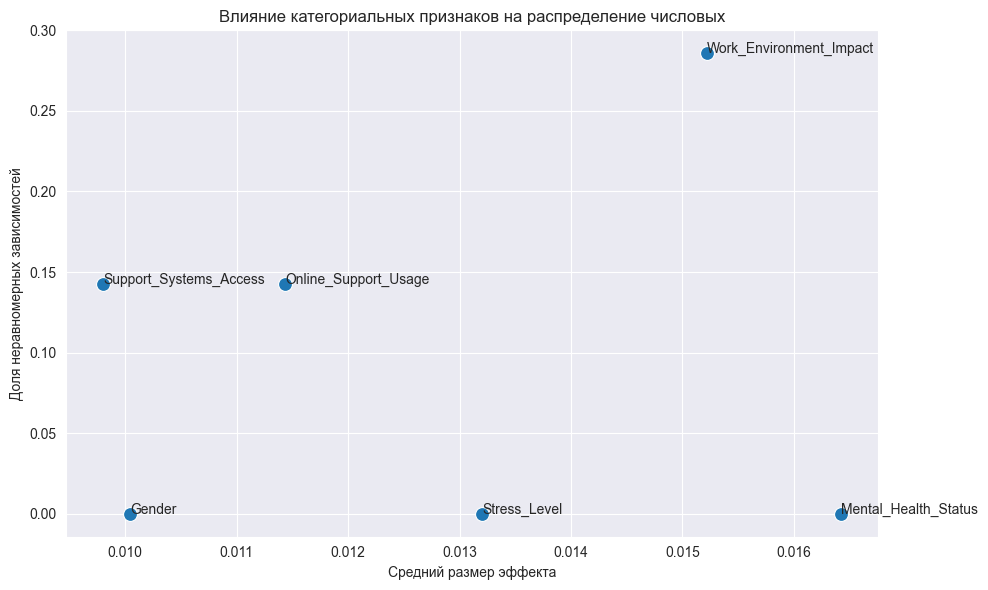

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_impact.reset_index(), x='effect_size', y='is_uniform', s=100)
for i, row in category_impact.reset_index().iterrows():
    plt.annotate(row['categorical_feature'], (row['effect_size'], row['is_uniform']))
plt.title('Влияние категориальных признаков на распределение числовых')
plt.xlabel('Средний размер эффекта')
plt.ylabel('Доля неравномерных зависимостей')
plt.tight_layout()
plt.show()

# Выводы по Анализу данных

## Визуализация распределения признаков:
* Создана функция `plot_distribution` для визуализации распределения каждого признака.
* Построены гистограммы для числовых признаков и столбчатые диаграммы для категориальных.
* Визуализация позволила быстро оценить характер распределения каждого признака.

## Корреляционный анализ:
* Построена тепловая карта корреляций для числовых признаков.
* Использована библиотека seaborn для наглядного представления корреляционной матрицы.
* Анализ позволил выявить наиболее сильные линейные связи между признаками.

## Тест на равномерность распределения:
* Разработана функция `test_uniformity` для проведения теста хи-квадрат.
* Проведен тест для всех признаков с уровнем значимости 0.05.
* Результаты теста визуализированы с помощью scatter plot, где показаны статистика хи-квадрат и p-value для каждого признака.
* Выявлены признаки с неравномерным распределением.

## Анализ зависимостей между числовыми и категориальными признаками:
* Создана функция `plot_boxplot` для визуализации зависимостей.
* Построены box plot'ы для всех комбинаций числовых и категориальных признаков.
* Разработана функция `test_uniformity_numeric_vs_categorical` для проведения однофакторного дисперсионного анализа (ANOVA).
* Проведен тест для всех комбинаций числовых и категориальных признаков.
* Результаты визуализированы с помощью scatter plot, показывающего размер эффекта и p-value для каждой комбинации.

## Сравнение результатов с предыдущим анализом:
* Проведено сравнение результатов теста на равномерность распределения с результатами анализа зависимостей.
* Выявлены несоответствия в результатах для некоторых признаков.

## Анализ влияния категориальных признаков:
* Рассчитана доля неравномерных зависимостей для каждого категориального признака.
* Вычислен средний размер эффекта для каждого категориального признака.
* Результаты визуализированы с помощью scatter plot, показывающего влияние каждого категориального признака на распределение числовых.

## Выводы:
* Выявлены признаки с наиболее неравномерным распределением.
* Обнаружены значимые зависимости между некоторыми числовыми и категориальными признаками.
* Определены категориальные признаки, оказывающие наибольшее влияние на распределение числовых (например, "Work_Environment_Impact").

